## Respiratory disease analysis MA
* Respiratory disease data MA analysis to understand disease burden
* Date: 27 June 24
* Mala Chaurasia


In [313]:
# PMDARIMA Incompatibility with numpy now. Hence to resolve older version of numpy on colab.
# https://stackoverflow.com/questions/78765325/numpy-dtype-size-changed-may-indicate-binary-incompatibility-expected-96-from
# Install older verion
#import os
#!pip install numpy==1.26.4 --quiet
#!pip install pmdarima --quiet

In [314]:
# imports
import pmdarima as pm
print("Version PMDARIMA : ", pm.__version__)
import numpy as np
print("Version NUMPY : ", np.__version__)

Version PMDARIMA :  2.0.4
Version NUMPY :  1.26.4


In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Time series
# importing libraries
from statsmodels.tsa.stattools import adfuller
import openpyxl
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
# Disallow display of convergence messages.
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

from typing import Union
from tqdm import tqdm_notebook
from statsmodels.stats.diagnostic import acorr_ljungbox
import ipywidgets

# Importing three sets of data
* Wastewater time series analysis
* Flu time series analysis
* Analysing correlation of respiratory viarl diseaes: covid &  wastewater, covid & influeza with vaccine

## Respiratory historical data

In [316]:
tabs = pd.ExcelFile("respiratory-disease-data-reporting-05-23-24.xlsx").sheet_names
print(tabs)

['Introduction', 'Visits by week', 'Data by Patient Demographics', 'Visits by Hospital County', 'Previous Seasons by Week', 'Historic demographic data', 'Data Dictionary', 'Definitions', 'Resources']


## Waste water historical data

In [317]:
tabs_wastewater = pd.ExcelFile("wastewater-dashboard-data-06-13-24.xlsx").sheet_names
print(tabs_wastewater)


['Introduction', 'Wastewater Testing Data', 'Sewer Area Detailed Data', 'Sewer Area Overview', 'FAQs', 'Data Dictionary', 'Additional Sewer Area Info']


## Viral respiratory diseases current data

In [318]:
tabs = pd.ExcelFile("viral-respiratory-page-data-05-23-24.xlsx").sheet_names
print(tabs)

['Introduction', 'COVID and Flu Levels', 'Respiratory Disease Reporting', 'Wastewater Reporting', 'COVID-19 Reporting', 'Vaccination data', 'Immunizations', 'Influenza Reporting', 'Severity Level Definitions', 'Data Dictionary']


In [319]:
covid_flu_levels=pd.read_excel("viral-respiratory-page-data-05-23-24.xlsx", 'COVID and Flu Levels')

In [320]:
respiratory_report=pd.read_excel("viral-respiratory-page-data-05-23-24.xlsx", 'Respiratory Disease Reporting')

In [321]:
wastewater_report=pd.read_excel("viral-respiratory-page-data-05-23-24.xlsx", 'Wastewater Reporting')

In [322]:
covid_report=pd.read_excel("viral-respiratory-page-data-05-23-24.xlsx", 'COVID-19 Reporting')

In [323]:
vaccination=pd.read_excel("viral-respiratory-page-data-05-23-24.xlsx", 'Vaccination data')

In [324]:
immunization=pd.read_excel("viral-respiratory-page-data-05-23-24.xlsx",  'Immunizations')

In [325]:
influenza_report=pd.read_excel("viral-respiratory-page-data-05-23-24.xlsx",  'Influenza Reporting')

# Descriptive analysis of each dataset



# Viral respiratory disease current data with following information

## 7 sheets within

* Covid Flu levels -current
* Current respiratory disease and ED visits + hospitalization
* Current wastewater Sars Cov2 concenrtation levels
* Covind 19 reportig
* Vaccinatio data
* Immunizartions data
* Influenza data

## Scope: Only Covid data will be consolidated and prediction models will be created.

In [326]:
covid_flu_levels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 7 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   Season                                                      138 non-null    object        
 1   Week Start Date                                             138 non-null    datetime64[ns]
 2   Week End Date                                               138 non-null    datetime64[ns]
 3   Severity level type                                         138 non-null    object        
 4   Percent of all visits for broad acute respiratory syndrome  92 non-null     float64       
 5   Severity Level                                              138 non-null    object        
 6   Last updated                                                138 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float

In [327]:
covid_flu_levels.describe(include=['object'])

Season Severity level type Severity Level
count         138                 138            138
unique          1                   3              6
top     2023-2024  COVID-19 ED visits            Low
freq          138                  46             86

In [328]:
covid_flu_levels.describe()

Week Start Date        Week End Date  \
count                  138                  138   
mean   2023-12-06 12:00:00  2023-12-12 12:00:00   
min    2023-07-02 00:00:00  2023-07-08 00:00:00   
25%    2023-09-17 00:00:00  2023-09-23 00:00:00   
50%    2023-12-06 12:00:00  2023-12-12 12:00:00   
75%    2024-02-25 00:00:00  2024-03-02 00:00:00   
max    2024-05-12 00:00:00  2024-05-18 00:00:00   
std                    NaN                  NaN   

       Percent of all visits for broad acute respiratory syndrome  \
count                                          92.000000            
mean                                            0.158533            
min                                             0.080000            
25%                                             0.130000            
50%                                             0.158500            
75%                                             0.187000            
max                                             0.286000            
std                                             0.045219            

              Last updated  
count                  138  
mean   2024-05-23 00:00:00  
min    2024-05-23 00:00:00  
25%    2024-05-23 00:00:00  
50%    2024-05-23 00:00:00  
75%    2024-05-23 00:00:00  
max    2024-05-23 00:00:00  
std                    NaN

In [329]:
covid_flu_levels.head()

Season Week Start Date Week End Date Severity level type  \
0  2023-2024      2023-07-02    2023-07-08  COVID-19 ED visits   
1  2023-2024      2024-02-04    2024-02-10  COVID-19 ED visits   
2  2023-2024      2023-08-20    2023-08-26  COVID-19 ED visits   
3  2023-2024      2023-12-10    2023-12-16  COVID-19 ED visits   
4  2023-2024      2023-12-17    2023-12-23  COVID-19 ED visits   

   Percent of all visits for broad acute respiratory syndrome Severity Level  \
0                                              0.082                 Minimal   
1                                              0.164                     Low   
2                                              0.094                     Low   
3                                              0.187                Moderate   
4                                              0.205                Moderate   

  Last updated  
0   2024-05-23  
1   2024-05-23  
2   2024-05-23  
3   2024-05-23  
4   2024-05-23

In [330]:
# Begin and end dates
print("Week begin date initial:", covid_flu_levels['Week Start Date'].min(), "\nWeek begin date last:", covid_flu_levels['Week Start Date'].max())


Week begin date initial: 2023-07-02 00:00:00 
Week begin date last: 2024-05-12 00:00:00


In [331]:
# Begin and end dates
print("Week end date initial:", covid_flu_levels['Week End Date'].min(), "\nWeek end date last:", covid_flu_levels['Week End Date'].max())

Week end date initial: 2023-07-08 00:00:00 
Week end date last: 2024-05-18 00:00:00


In [332]:
covid_flu_levels['Severity level type'].value_counts()

Severity level type
COVID-19 ED visits              46
COVID-19 Hospital Admissions    46
Influenza                       46
Name: count, dtype: int64

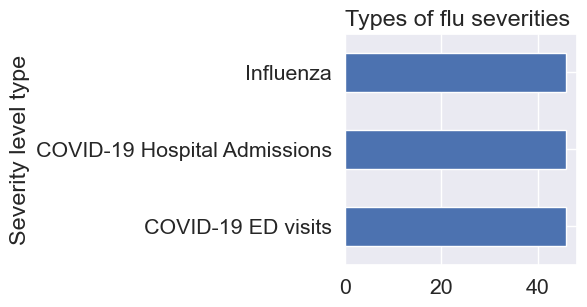

In [333]:
plt.figure(figsize=(3,3))
covid_flu_levels['Severity level type'].value_counts().plot(kind='barh')
plt.title("Types of flu severities ");

In [334]:
covid_flu_levels['Severity Level'].value_counts()

Severity Level
Low            86
Minimal        22
Moderate       18
High            6
Medium          5
Substantial     1
Name: count, dtype: int64

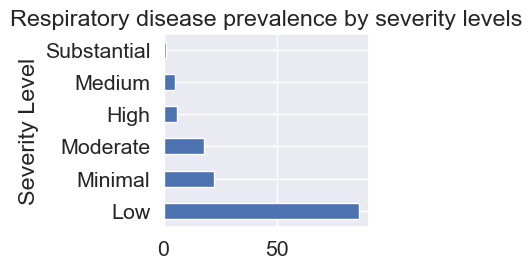

In [335]:
plt.figure(figsize=(4,3))
covid_flu_levels['Severity Level'].value_counts().plot(kind='barh')
plt.title("Respiratory disease prevalence by severity levels");

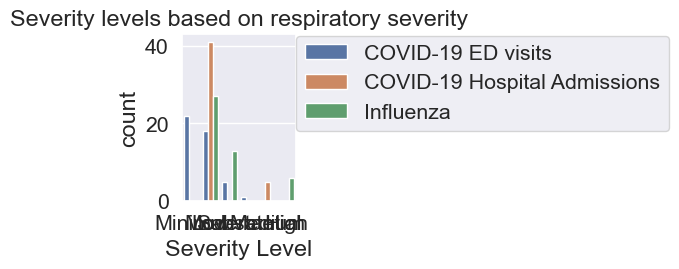

In [336]:
plt.figure(figsize=(6,3))
sns.countplot(covid_flu_levels, x='Severity Level', hue='Severity level type').set(title='Severity levels based on respiratory severity');
# Put the legend out of the figure
plt.legend( bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0.);

In [337]:
covid_flu_levels.isna().any()

Season                                                        False
Week Start Date                                               False
Week End Date                                                 False
Severity level type                                           False
Percent of all visits for broad acute respiratory syndrome     True
Severity Level                                                False
Last updated                                                  False
dtype: bool

In [338]:
covid_flu_levels[covid_flu_levels['Severity level type']=='COVID-19 ED visits']['Percent of all visits for broad acute respiratory syndrome']

0     0.082
1     0.164
2     0.094
3     0.187
4     0.205
5     0.101
6     0.135
7     0.211
8     0.099
9     0.131
10    0.080
11    0.143
12    0.112
13    0.080
14    0.135
15    0.146
16    0.138
17    0.080
18    0.106
19    0.159
20    0.159
21    0.090
22    0.169
23    0.143
24    0.130
25    0.153
26    0.165
27    0.176
28    0.083
29    0.115
30    0.126
31    0.139
32    0.095
33    0.081
34    0.148
35    0.179
36    0.225
37    0.121
38    0.156
39    0.164
40    0.126
41    0.087
42    0.104
43    0.183
44    0.163
45    0.122
Name: Percent of all visits for broad acute respiratory syndrome, dtype: float64

In [339]:

covid_flu_levels[covid_flu_levels['Severity level type']=='COVID-19 Hospital Admissions']['Percent of all visits for broad acute respiratory syndrome']

46    0.130
47    0.202
48    0.150
49    0.234
50    0.247
51    0.158
52    0.182
53    0.273
54    0.136
55    0.177
56    0.134
57    0.185
58    0.164
59    0.129
60    0.172
61    0.187
62    0.185
63    0.131
64    0.153
65    0.197
66    0.201
67    0.139
68    0.213
69    0.178
70    0.190
71    0.199
72    0.217
73    0.227
74    0.131
75    0.164
76    0.188
77    0.181
78    0.151
79    0.107
80    0.194
81    0.224
82    0.286
83    0.168
84    0.194
85    0.210
86    0.182
87    0.143
88    0.157
89    0.243
90    0.208
91    0.174
Name: Percent of all visits for broad acute respiratory syndrome, dtype: float64

In [340]:
covid_flu_levels[covid_flu_levels['Severity level type']=='Influenza']['Percent of all visits for broad acute respiratory syndrome']

92    NaN
93    NaN
94    NaN
95    NaN
96    NaN
97    NaN
98    NaN
99    NaN
100   NaN
101   NaN
102   NaN
103   NaN
104   NaN
105   NaN
106   NaN
107   NaN
108   NaN
109   NaN
110   NaN
111   NaN
112   NaN
113   NaN
114   NaN
115   NaN
116   NaN
117   NaN
118   NaN
119   NaN
120   NaN
121   NaN
122   NaN
123   NaN
124   NaN
125   NaN
126   NaN
127   NaN
128   NaN
129   NaN
130   NaN
131   NaN
132   NaN
133   NaN
134   NaN
135   NaN
136   NaN
137   NaN
Name: Percent of all visits for broad acute respiratory syndrome, dtype: float64

## Influenza % visits were not tracked. Keeping data as is for later analysis. Since covid will form a separate set.

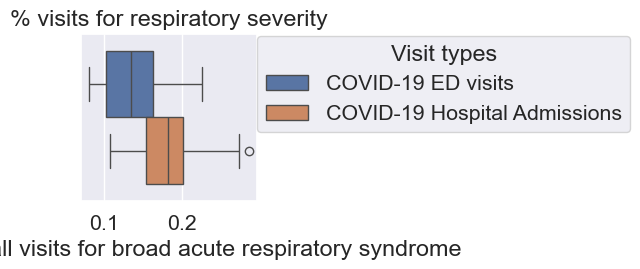

In [341]:
# Box plot for percent of all visits for acute respiratory syndrome. Filtering out influenza
df=covid_flu_levels[ (covid_flu_levels['Severity level type']=='COVID-19 Hospital Admissions') | (covid_flu_levels['Severity level type']=='COVID-19 ED visits')]
plt.figure(figsize=(6,3))
sns.boxplot(df, x='Percent of all visits for broad acute respiratory syndrome', hue ='Severity level type').set(title="% visits for respiratory severity")
# Put the legend out of the figure
plt.legend(title='Visit types',  bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0.);


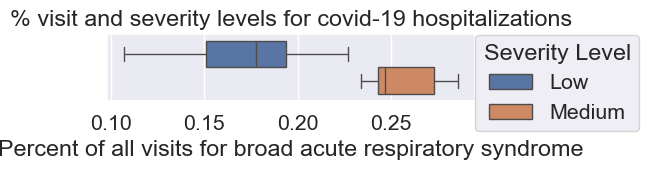

In [342]:
# Box plot for percent of all visits for acute respiratory syndrome.Filtered out influenza as all values are null
df1=covid_flu_levels[covid_flu_levels['Severity level type']=='COVID-19 Hospital Admissions']
plt.figure(figsize=(6,2))
sns.boxplot(df1, x='Percent of all visits for broad acute respiratory syndrome', hue ='Severity Level').set(title="% visit and severity levels for covid-19 hospitalizations")
# Put the legend out of the figure
plt.legend( title='Severity Level', bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0.);

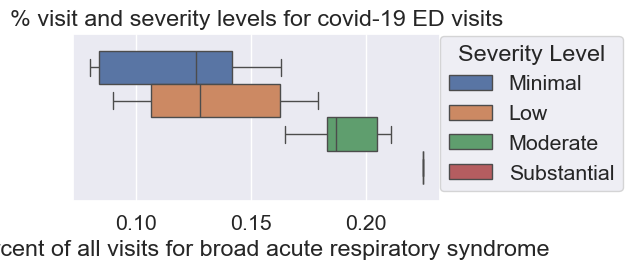

In [343]:
# Box plot for percent of all visits for acute respiratory syndrome.Filtered out influenza as all values are null
df1=covid_flu_levels[covid_flu_levels['Severity level type']=='COVID-19 ED visits']
plt.figure(figsize=(6,3))
sns.boxplot(df1, x='Percent of all visits for broad acute respiratory syndrome', hue ='Severity Level').set(title="% visit and severity levels for covid-19 ED visits");
# Put the legend out of the figure
plt.legend(  title='Severity Level', bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0.);

## Respiratory report


In [344]:
respiratory_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Season                                               92 non-null     object        
 1   Week Start Date                                      92 non-null     datetime64[ns]
 2   Week End Date                                        92 non-null     datetime64[ns]
 3   Visit type                                           92 non-null     object        
 4   Percent of all visits for acute respiratory disease  92 non-null     float64       
 5   Percent of all visits for COVID-19                   92 non-null     float64       
 6   Percent of all visits for RSV                        92 non-null     float64       
 7   Percent of all visits for influenza                  92 non-null     float64       
 8   Las

In [345]:
respiratory_report.describe()

Week Start Date        Week End Date  \
count                   92                   92   
mean   2023-12-06 12:00:00  2023-12-12 12:00:00   
min    2023-07-02 00:00:00  2023-07-08 00:00:00   
25%    2023-09-17 00:00:00  2023-09-23 00:00:00   
50%    2023-12-06 12:00:00  2023-12-12 12:00:00   
75%    2024-02-25 00:00:00  2024-03-02 00:00:00   
max    2024-05-12 00:00:00  2024-05-18 00:00:00   
std                    NaN                  NaN   

       Percent of all visits for acute respiratory disease  \
count                                          92.000000     
mean                                            0.158533     
min                                             0.080000     
25%                                             0.130000     
50%                                             0.158500     
75%                                             0.187000     
max                                             0.286000     
std                                             0.045219     

       Percent of all visits for COVID-19  Percent of all visits for RSV  \
count                           92.000000                      92.000000   
mean                             0.021348                       0.004359   
min                              0.004000                       0.000000   
25%                              0.010000                       0.000750   
50%                              0.019000                       0.002000   
75%                              0.029250                       0.006250   
max                              0.072000                       0.021000   
std                              0.014570                       0.005670   

       Percent of all visits for influenza         Last updated  
count                            92.000000                   92  
mean                              0.011261  2024-05-23 00:00:00  
min                               0.000000  2024-05-23 00:00:00  
25%                               0.001000  2024-05-23 00:00:00  
50%                               0.005000  2024-05-23 00:00:00  
75%                               0.021000  2024-05-23 00:00:00  
max                               0.043000  2024-05-23 00:00:00  
std                               0.011838                  NaN

In [346]:
respiratory_report.describe(include='object')

Season Visit type
count          92         92
unique          1          2
top     2023-2024  ED visits
freq           92         46

In [347]:
respiratory_report.head()

Season Week Start Date Week End Date Visit type  \
0  2023-2024      2023-07-02    2023-07-08  ED visits   
1  2023-2024      2024-02-04    2024-02-10  ED visits   
2  2023-2024      2023-08-20    2023-08-26  ED visits   
3  2023-2024      2023-12-10    2023-12-16  ED visits   
4  2023-2024      2023-12-17    2023-12-23  ED visits   

   Percent of all visits for acute respiratory disease  \
0                                              0.082     
1                                              0.164     
2                                              0.094     
3                                              0.187     
4                                              0.205     

   Percent of all visits for COVID-19  Percent of all visits for RSV  \
0                               0.005                          0.000   
1                               0.019                          0.002   
2                               0.018                          0.000   
3                               0.030                          0.014   
4                               0.037                          0.012   

   Percent of all visits for influenza Last updated  
0                                0.001   2024-05-23  
1                                0.030   2024-05-23  
2                                0.001   2024-05-23  
3                                0.021   2024-05-23  
4                                0.032   2024-05-23

In [348]:
# Begin and end dates
print("Week start date initial:", respiratory_report['Week Start Date'].min(), "\nWeek start date last:", respiratory_report['Week Start Date'].max())


Week start date initial: 2023-07-02 00:00:00 
Week start date last: 2024-05-12 00:00:00


In [349]:
# Begin and end dates
print("Week end date initial:", respiratory_report['Week End Date'].min(), "\nWeek end date last:", respiratory_report['Week End Date'].max())

Week end date initial: 2023-07-08 00:00:00 
Week end date last: 2024-05-18 00:00:00


In [350]:
respiratory_report['Visit type'].value_counts()

Visit type
ED visits              46
Hospital admissions    46
Name: count, dtype: int64

In [351]:
respiratory_report['Week Start Date'].dt.date.sort_values() # Observation : repeat of the dates

0     2023-07-02
46    2023-07-02
17    2023-07-09
63    2023-07-09
56    2023-07-16
         ...    
64    2024-04-28
8     2024-05-05
54    2024-05-05
79    2024-05-12
33    2024-05-12
Name: Week Start Date, Length: 92, dtype: object

In [352]:
respiratory_report['Visit type'].value_counts()

Visit type
ED visits              46
Hospital admissions    46
Name: count, dtype: int64

In [353]:
ED_Visits=respiratory_report[respiratory_report['Visit type']=='ED visits']

In [354]:
Hospital_admissions=respiratory_report[respiratory_report['Visit type']=='Hospital admissions']

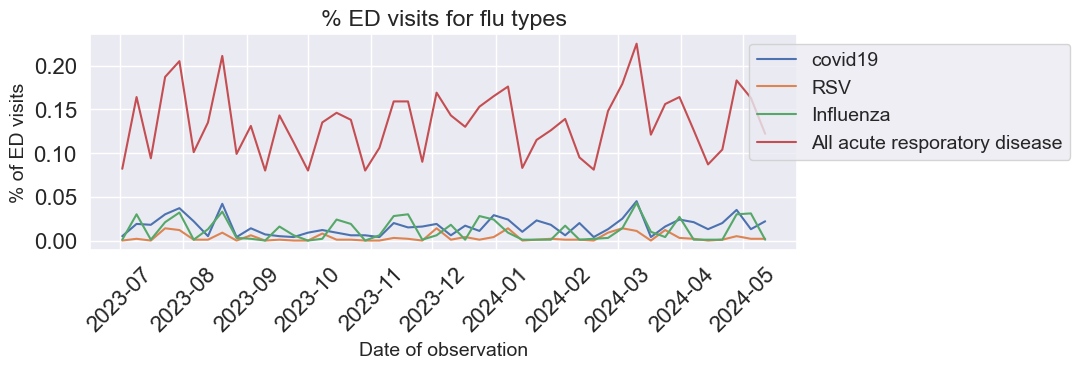

In [355]:
x = ED_Visits['Week Start Date'].dt.date.sort_values()

y1 = ED_Visits['Percent of all visits for COVID-19']
y2 = ED_Visits['Percent of all visits for RSV']
y3 = ED_Visits['Percent of all visits for influenza']
y4 = ED_Visits['Percent of all visits for acute respiratory disease']
plt.figure(figsize=(12,4))
plt.plot(x, y1,  label ='covid19')
plt.plot(x, y2,  label ='RSV')
plt.plot(x, y3,  label ='Influenza')
plt.plot(x, y4,  label ='All acute resporatory disease')
plt.xlabel("Date of observation", fontsize=14)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16, rotation=45)
plt.ylabel("% of ED visits", fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1.),fontsize=14)
plt.title('% ED visits for flu types')
plt.show()


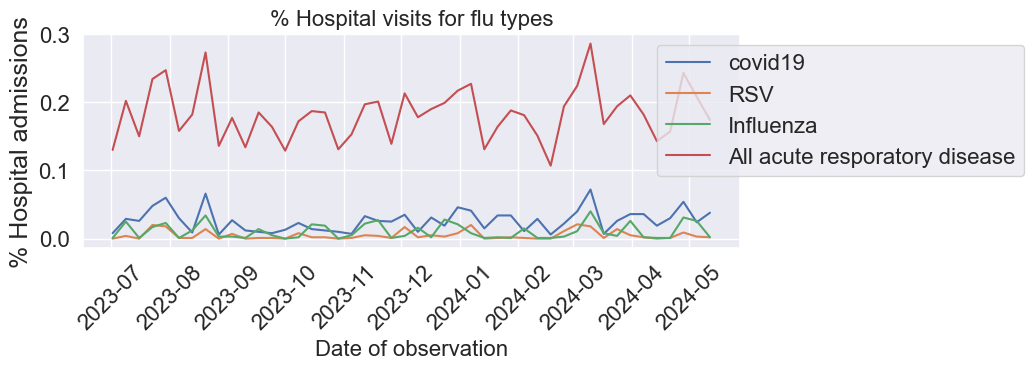

In [356]:
x = Hospital_admissions['Week Start Date'].dt.date.sort_values()


y1 = Hospital_admissions['Percent of all visits for COVID-19']
y2 = Hospital_admissions['Percent of all visits for RSV']
y3 = Hospital_admissions['Percent of all visits for influenza']
y4 = Hospital_admissions['Percent of all visits for acute respiratory disease']
plt.figure(figsize=(12,4))
plt.plot(x, y1,  label ='covid19')
plt.plot(x, y2,  label ='RSV')
plt.plot(x, y3,  label ='Influenza')
plt.plot(x, y4,  label ='All acute resporatory disease')
plt.xlabel("Date of observation",fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16, rotation=45)
plt.ylabel("% Hospital admissions", fontsize=18)
plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1.),fontsize=16)
plt.title('% Hospital visits for flu types', fontsize=16)
plt.show()


# Wastewater analysis

In [357]:
wastewater_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Week Start Date                                       47 non-null     datetime64[ns]
 1   Week End Date                                         47 non-null     datetime64[ns]
 2   Number of samples where SARS-CoV-2 was detected       47 non-null     int64         
 3   Last updated                                          47 non-null     datetime64[ns]
 4   Statewide average effective SARS-CoV-2 concentration  47 non-null     float64       
dtypes: datetime64[ns](3), float64(1), int64(1)
memory usage: 2.0 KB


In [358]:
wastewater_report.describe()

Week Start Date        Week End Date  \
count                   47                   47   
mean   2023-12-10 00:00:00  2023-12-16 00:00:00   
min    2023-07-02 00:00:00  2023-07-08 00:00:00   
25%    2023-09-20 12:00:00  2023-09-26 12:00:00   
50%    2023-12-10 00:00:00  2023-12-16 00:00:00   
75%    2024-02-28 12:00:00  2024-03-05 12:00:00   
max    2024-05-19 00:00:00  2024-05-25 00:00:00   
std                    NaN                  NaN   

       Number of samples where SARS-CoV-2 was detected         Last updated  \
count                                        47.000000                   47   
mean                                         94.042553  2024-05-23 00:00:00   
min                                          21.000000  2024-05-23 00:00:00   
25%                                          93.500000  2024-05-23 00:00:00   
50%                                          96.000000  2024-05-23 00:00:00   
75%                                          99.000000  2024-05-23 00:00:00   
max                                         119.000000  2024-05-23 00:00:00   
std                                          12.894147                  NaN   

       Statewide average effective SARS-CoV-2 concentration  
count                                       4.700000e+01     
mean                                        9.608283e+05     
min                                         2.126594e+05     
25%                                         4.660712e+05     
50%                                         7.763483e+05     
75%                                         1.206864e+06     
max                                         3.427776e+06     
std                                         7.102229e+05

In [359]:
wastewater_report.head()

Week Start Date Week End Date  \
0      2023-11-12    2023-11-18   
1      2023-12-17    2023-12-23   
2      2023-10-08    2023-10-14   
3      2023-09-17    2023-09-23   
4      2024-05-12    2024-05-18   

   Number of samples where SARS-CoV-2 was detected Last updated  \
0                                               99   2024-05-23   
1                                               96   2024-05-23   
2                                               85   2024-05-23   
3                                               98   2024-05-23   
4                                               96   2024-05-23   

   Statewide average effective SARS-CoV-2 concentration  
0                                       6.144834e+05     
1                                       1.753926e+06     
2                                       6.230803e+05     
3                                       9.487317e+05     
4                                       3.652727e+05

In [360]:
# Begin and end dates
print("Week start date initial:", wastewater_report['Week Start Date'].min(), "\nWeek start date last:", wastewater_report['Week Start Date'].max())


Week start date initial: 2023-07-02 00:00:00 
Week start date last: 2024-05-19 00:00:00


In [361]:
# Begin and end dates
print("Week end date initial:", wastewater_report['Week End Date'].min(), "\nWeek end date last:", wastewater_report['Week End Date'].max())

Week end date initial: 2023-07-08 00:00:00 
Week end date last: 2024-05-25 00:00:00


In [362]:
print("Min and max samples with SARS-CoV-2 infection")
wastewater_report['Number of samples where SARS-CoV-2 was detected'].min(), wastewater_report['Number of samples where SARS-CoV-2 was detected'].max()

Min and max samples with SARS-CoV-2 infection


(21, 119)

In [363]:
print("Min and max average statewide concentration of SARS-CoV-2 infection")
wastewater_report['Statewide average effective SARS-CoV-2 concentration'].min(), wastewater_report['Statewide average effective SARS-CoV-2 concentration'].max()

Min and max average statewide concentration of SARS-CoV-2 infection


(212659.40786909143, 3427776.4785423)

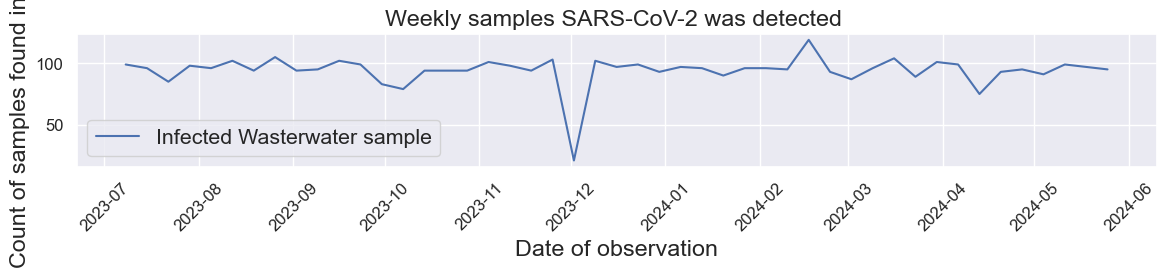

In [364]:
x = wastewater_report['Week End Date'].dt.date.sort_values()
y1 = wastewater_report['Number of samples where SARS-CoV-2 was detected']

plt.figure(figsize=(12,3))
plt.plot(x, y1, label ='Infected Wasterwater sample')

plt.xlabel("Date of observation")
plt.ylabel("Count of samples found infected")
plt.legend()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.title('Weekly samples SARS-CoV-2 was detected ')
plt.show()

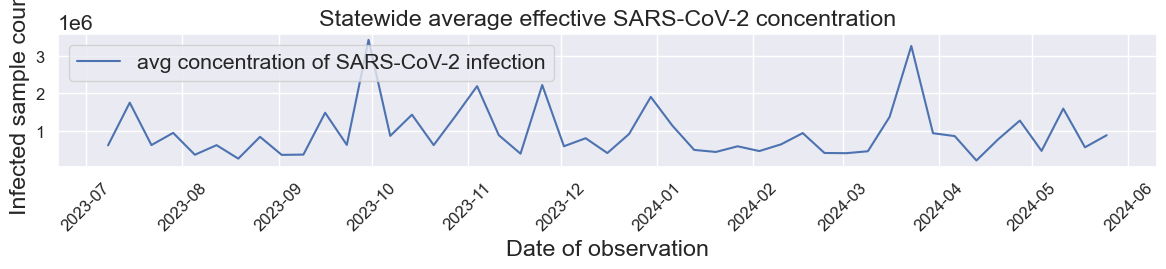

In [365]:
x = wastewater_report['Week End Date'].dt.date.sort_values()
y2 = wastewater_report['Statewide average effective SARS-CoV-2 concentration']

plt.figure(figsize=(12,3))
plt.plot(x, y2, label ='avg concentration of SARS-CoV-2 infection')

plt.xlabel("Date of observation")
plt.ylabel("Infected sample count")
plt.legend()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.title('Statewide average effective SARS-CoV-2 concentration')
plt.show()

## Covid cases and mortality

In [366]:
covid_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Week Start Date                46 non-null     datetime64[ns]
 1   Week End Date                  46 non-null     datetime64[ns]
 2   Confirmed and probable deaths  46 non-null     int64         
 3   Confirmed and probable cases   46 non-null     int64         
 4   Last updated                   46 non-null     datetime64[ns]
dtypes: datetime64[ns](3), int64(2)
memory usage: 1.9 KB


In [367]:
covid_report.describe()

Week Start Date        Week End Date  \
count                   46                   46   
mean   2023-12-06 12:00:00  2023-12-12 12:00:00   
min    2023-07-02 00:00:00  2023-07-08 00:00:00   
25%    2023-09-18 18:00:00  2023-09-24 18:00:00   
50%    2023-12-06 12:00:00  2023-12-12 12:00:00   
75%    2024-02-23 06:00:00  2024-02-29 06:00:00   
max    2024-05-12 00:00:00  2024-05-18 00:00:00   
std                    NaN                  NaN   

       Confirmed and probable deaths  Confirmed and probable cases  \
count                      46.000000                     46.000000   
mean                       23.586957                   2736.826087   
min                         2.000000                    658.000000   
25%                        10.500000                   1104.000000   
50%                        24.000000                   2578.000000   
75%                        32.000000                   3691.000000   
max                        60.000000                   6893.000000   
std                        14.743098                   1742.694342   

              Last updated  
count                   46  
mean   2024-05-23 00:00:00  
min    2024-05-23 00:00:00  
25%    2024-05-23 00:00:00  
50%    2024-05-23 00:00:00  
75%    2024-05-23 00:00:00  
max    2024-05-23 00:00:00  
std                    NaN

In [368]:
covid_report.head()

Week Start Date Week End Date  Confirmed and probable deaths  \
0      2024-03-17    2024-03-23                             15   
1      2023-07-30    2023-08-05                              2   
2      2023-07-16    2023-07-22                              9   
3      2024-04-07    2024-04-13                              8   
4      2023-08-27    2023-09-02                             24   

   Confirmed and probable cases Last updated  
0                          1006   2024-05-23  
1                          1739   2024-05-23  
2                          1146   2024-05-23  
3                           862   2024-05-23  
4                          3400   2024-05-23

In [369]:
# Begin and end dates
print("Week start date initial:", covid_report['Week Start Date'].min(), "\nWeek start date last:", covid_report['Week Start Date'].max())


Week start date initial: 2023-07-02 00:00:00 
Week start date last: 2024-05-12 00:00:00


In [370]:
# Begin and end dates
print("Week end date initial:", covid_report['Week End Date'].min(), "\nWeek end date last:", covid_report['Week End Date'].max())

Week end date initial: 2023-07-08 00:00:00 
Week end date last: 2024-05-18 00:00:00


In [371]:
print("Min and max confirmed and probable deaths due to covid in week")
covid_report['Confirmed and probable deaths'].min(), covid_report['Confirmed and probable deaths'].max()

Min and max confirmed and probable deaths due to covid in week


(2, 60)

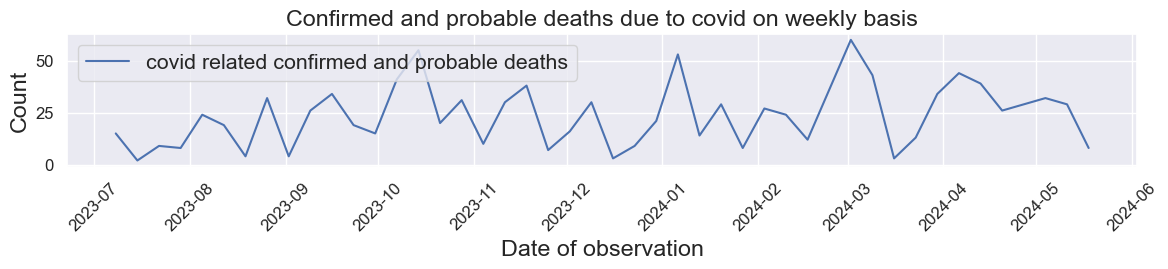

In [372]:
x = covid_report['Week End Date'].dt.date.sort_values()
y1 = covid_report['Confirmed and probable deaths']

plt.figure(figsize=(12,3))
plt.plot(x, y1, label ='covid related confirmed and probable deaths')

plt.xlabel("Date of observation")
plt.ylabel("Count")
plt.legend()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.title('Confirmed and probable deaths due to covid on weekly basis')
plt.show()

In [373]:
print("Min and max confirmed and probable covid cases in week")
covid_report['Confirmed and probable cases'].min(), covid_report['Confirmed and probable cases'].max()

Min and max confirmed and probable covid cases in week


(658, 6893)

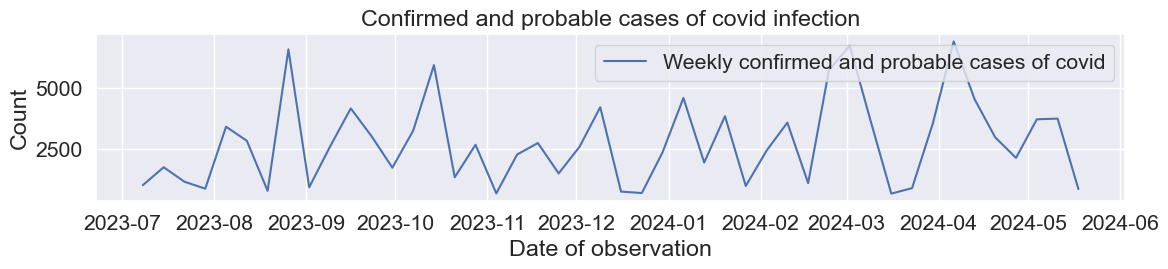

In [374]:
x = covid_report['Week End Date'].dt.date.sort_values()
y1 = covid_report['Confirmed and probable cases']

plt.figure(figsize=(12,3))
plt.plot(x, y1, label ='Weekly confirmed and probable cases of covid')

plt.xlabel("Date of observation")
plt.ylabel("Count")
plt.legend()
plt.title('Confirmed and probable cases of covid infection')
plt.show()

## Vaccination data analysis

In [375]:
vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Season                                     92 non-null     object        
 1   Start Date                                 92 non-null     datetime64[ns]
 2   End Date                                   92 non-null     datetime64[ns]
 3   Type of vaccine                            92 non-null     object        
 4   Group                                      92 non-null     object        
 5   Subgroup                                   92 non-null     object        
 6   Population                                 92 non-null     float64       
 7   Percent of MA total population vaccinated  92 non-null     float64       
 8   Last updated                               92 non-null     datetime64[ns]
dtypes: datetime64[ns](3), fl

In [376]:
vaccination.describe()

Start Date             End Date    Population  \
count                   92                   92  9.200000e+01   
mean   2023-07-02 00:00:00  2023-12-12 12:00:00  7.029917e+06   
min    2023-07-02 00:00:00  2023-07-08 00:00:00  7.029917e+06   
25%    2023-07-02 00:00:00  2023-09-23 00:00:00  7.029917e+06   
50%    2023-07-02 00:00:00  2023-12-12 12:00:00  7.029917e+06   
75%    2023-07-02 00:00:00  2024-03-02 00:00:00  7.029917e+06   
max    2023-07-02 00:00:00  2024-05-18 00:00:00  7.029917e+06   
std                    NaN                  NaN  2.809277e-09   

       Percent of MA total population vaccinated         Last updated  
count                                  92.000000                   92  
mean                                    0.197793  2024-05-23 00:00:00  
min                                     0.000000  2024-05-23 00:00:00  
25%                                     0.031750  2024-05-23 00:00:00  
50%                                     0.205000  2024-05-23 00:00:00  
75%                                     0.358250  2024-05-23 00:00:00  
max                                     0.417000  2024-05-23 00:00:00  
std                                     0.151368                  NaN

In [377]:
vaccination.describe(include='object')

Season Type of vaccine  Group                      Subgroup
count          92              92     92                            92
unique          1               2      1                             1
top     2023-2024        COVID-19  Total  Total vaccinated individuals
freq           92              46     92                            92

In [378]:
vaccination.head()

Season Start Date   End Date Type of vaccine  Group  \
0  2023-2024 2023-07-02 2023-07-08        COVID-19  Total   
1  2023-2024 2023-07-02 2023-07-15        COVID-19  Total   
2  2023-2024 2023-07-02 2023-07-22        COVID-19  Total   
3  2023-2024 2023-07-02 2023-07-29        COVID-19  Total   
4  2023-2024 2023-07-02 2023-08-05        COVID-19  Total   

                       Subgroup    Population  \
0  Total vaccinated individuals  7.029917e+06   
1  Total vaccinated individuals  7.029917e+06   
2  Total vaccinated individuals  7.029917e+06   
3  Total vaccinated individuals  7.029917e+06   
4  Total vaccinated individuals  7.029917e+06   

   Percent of MA total population vaccinated Last updated  
0                                        0.0   2024-05-23  
1                                        0.0   2024-05-23  
2                                        0.0   2024-05-23  
3                                        0.0   2024-05-23  
4                                        0.0   2024-05-23

In [379]:
# Begin and end dates
print("Week start date initial:", vaccination['Start Date'].min(), "\nWeek start date last:", vaccination['Start Date'].max())


Week start date initial: 2023-07-02 00:00:00 
Week start date last: 2023-07-02 00:00:00


In [380]:
# Begin and end dates
print("Week end date initial:", vaccination['End Date'].min(), "\nWeek end date last:", vaccination['End Date'].max())

Week end date initial: 2023-07-08 00:00:00 
Week end date last: 2024-05-18 00:00:00


In [381]:
vaccination['Type of vaccine'].unique()

array(['COVID-19', 'Influenza'], dtype=object)

In [382]:
print("Min and max percent of vaccinated people in MA for COVID19")
vaccination[vaccination['Type of vaccine']=='COVID-19']['Percent of MA total population vaccinated'].min(), vaccination[vaccination['Type of vaccine']=='COVID-19']['Percent of MA total population vaccinated'].max(),


Min and max percent of vaccinated people in MA for COVID19


(0.0, 0.219)

In [383]:
vaccination[vaccination['Type of vaccine']=='Influenza']['Percent of MA total population vaccinated'].min(),  vaccination[vaccination['Type of vaccine']=='Influenza']['Percent of MA total population vaccinated'].max(),

(0.0, 0.417)

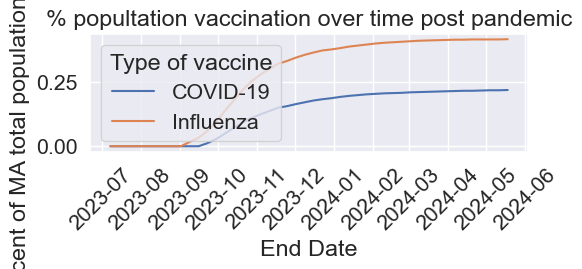

In [384]:
# Vaccination
plt.figure(figsize=(6,3))
plt.xticks(rotation=45)
sns.lineplot(vaccination, x='End Date', y='Percent of MA total population vaccinated', hue='Type of vaccine').set(title='% popultation vaccination over time post pandemic');


## Immunization data analysis

In [385]:
immunization.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Type of vaccine                     144 non-null    object        
 1   Season                              144 non-null    object        
 2   Start Date                          144 non-null    datetime64[ns]
 3   End Date                            144 non-null    datetime64[ns]
 4   Group                               144 non-null    object        
 5   Subgroup                            144 non-null    object        
 6   Population                          144 non-null    float64       
 7   Percent of MA residents vaccinated  144 non-null    object        
 8   Last updated                        144 non-null    datetime64[ns]
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 10.3+ KB


In [386]:
immunization.describe()

Start Date             End Date    Population  \
count                  144                  144  1.440000e+02   
mean   2023-02-20 13:20:00  2023-08-10 15:20:00  7.029917e+06   
min    2022-07-03 00:00:00  2022-07-09 00:00:00  7.029917e+06   
25%    2022-07-03 00:00:00  2023-03-16 06:00:00  7.029917e+06   
50%    2023-07-02 00:00:00  2023-09-12 12:00:00  7.029917e+06   
75%    2023-07-02 00:00:00  2024-01-14 18:00:00  7.029917e+06   
max    2023-07-02 00:00:00  2024-05-18 00:00:00  7.029917e+06   
std                    NaN                  NaN  9.345733e-10   

              Last updated  
count                  144  
mean   2024-03-23 08:00:00  
min    2023-12-07 00:00:00  
25%    2023-12-07 00:00:00  
50%    2024-05-23 00:00:00  
75%    2024-05-23 00:00:00  
max    2024-05-23 00:00:00  
std                    NaN

In [387]:
immunization.describe(include='object')

Type of vaccine     Season  Group                      Subgroup  \
count              144        144    144                           144   
unique               2          2      1                             1   
top          Influenza  2023-2024  Total  Total vaccinated individuals   
freq                98         92    144                           144   

       Percent of MA residents vaccinated  
count                                 144  
unique                                 99  
top                                < 1.0%  
freq                                   29

In [388]:
immunization.head()

Type of vaccine     Season Start Date   End Date  Group  \
0        COVID-19  2023-2024 2023-07-02 2023-07-08  Total   
1        COVID-19  2023-2024 2023-07-02 2023-07-15  Total   
2        COVID-19  2023-2024 2023-07-02 2023-07-22  Total   
3        COVID-19  2023-2024 2023-07-02 2023-07-29  Total   
4        COVID-19  2023-2024 2023-07-02 2023-08-05  Total   

                       Subgroup    Population  \
0  Total vaccinated individuals  7.029917e+06   
1  Total vaccinated individuals  7.029917e+06   
2  Total vaccinated individuals  7.029917e+06   
3  Total vaccinated individuals  7.029917e+06   
4  Total vaccinated individuals  7.029917e+06   

  Percent of MA residents vaccinated Last updated  
0                             < 1.0%   2024-05-23  
1                             < 1.0%   2024-05-23  
2                             < 1.0%   2024-05-23  
3                             < 1.0%   2024-05-23  
4                             < 1.0%   2024-05-23

In [389]:
immunization['Type of vaccine'].unique()

array(['COVID-19', 'Influenza'], dtype=object)

In [390]:
immunization['Season'].unique()

array(['2023-2024', '2022-2023'], dtype=object)

### Note
* start and end date columns differet than other datasets

In [391]:
# Begin and end dates
print("Start date initial:", immunization['Start Date'].min(), "\nWeek start date last:", immunization['Start Date'].max())


Start date initial: 2022-07-03 00:00:00 
Week start date last: 2023-07-02 00:00:00


In [392]:
# Begin and end dates
print("End date initial:", immunization['End Date'].min(), "\nEnd date last:", immunization['End Date'].max())

End date initial: 2022-07-09 00:00:00 
End date last: 2024-05-18 00:00:00


### Cleanup of 'Percent of MA residents vaccinated'

In [393]:
# Verification for cleaning 'Percent of MA residents vaccinated'
immunization['Percent of MA residents vaccinated'].value_counts()

Percent of MA residents vaccinated
< 1.0%    29
45.30%    10
41.6%      4
45.20%     3
21.6%      2
          ..
21.9%      1
21.7%      1
21.5%      1
21.4%      1
37.3%      1
Name: count, Length: 99, dtype: int64

In [394]:
# Verification for cleaning 'Percent of MA residents vaccinated'
immunization['Percent of MA residents vaccinated'].unique()

array(['< 1.0%', '1.2%', '2.8%', '5.0%', '7.2%', '9.3%', '11.0%', '12.4%',
       '13.7%', '15.0%', '15.6%', '16.4%', '17.1%', '17.8%', '18.3%',
       '18.7%', '19.2%', '19.6%', '19.9%', '20.2%', '20.4%', '20.6%',
       '20.7%', '20.8%', '21.0%', '21.1%', '21.2%', '21.3%', '21.4%',
       '21.5%', '21.6%', '21.7%', '21.8%', '21.9%', '41.7%', '40.5%',
       '40.0%', '6.0%', '41.1%', '27.9%', '37.7%', '32.1%', '41.2%',
       '40.9%', '22.0%', '25.3%', '30.1%', '41.6%', '40.3%', '37.3%',
       '38.8%', '41.4%', '34.5%', '13.9%', '39.6%', '41.5%', '36.5%',
       '17.9%', '9.6%', '3.3%', '41.3%', '38.2%', '33.2%', '39.2%',
       '40.7%', '1.7%', '35.6%', '1.90%', '4.00%', '6.70%', '10.20%',
       '14.50%', '18.90%', '23.20%', '26.90%', '30.10%', '32.60%',
       '34.90%', '36.10%', '37.50%', '38.80%', '40.10%', '41.00%',
       '41.60%', '42.10%', '42.70%', '43.10%', '43.50%', '43.80%',
       '44.10%', '44.30%', '44.50%', '44.70%', '44.80%', '44.90%',
       '45.00%', '45.10%', '45

In [395]:
# Cleanup and conversion to float of 'Percent of MA residents vaccinated'
immunization['Percent of MA residents vaccinated']=immunization['Percent of MA residents vaccinated'].str.strip("%")
# replacing '< 1.0' with 0.5
update_index=immunization[immunization['Percent of MA residents vaccinated']=='< 1.0'].index
update_index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  92,  93,  94,  95,  96,  97,  98,  99,
       100],
      dtype='int64')

In [396]:
for i in update_index:
  immunization['Percent of MA residents vaccinated'][i]=0.5
# Verification
immunization[immunization['Percent of MA residents vaccinated']=='< 1.0'].index

Index([], dtype='int64')

In [397]:
immunization['Percent of MA residents vaccinated']=immunization['Percent of MA residents vaccinated'].astype(np.float64)

In [398]:
print('Min and Max percentage of people vaccinated for covid-19')
immunization[immunization['Type of vaccine']=='COVID-19']['Percent of MA residents vaccinated'].min(), immunization[immunization['Type of vaccine']=='COVID-19']['Percent of MA residents vaccinated'].max()

Min and Max percentage of people vaccinated for covid-19


(0.5, 21.9)

In [399]:
print('Min and Max percentage of people vaccinated for Influenza')
immunization[immunization['Type of vaccine']=='Influenza']['Percent of MA residents vaccinated'].min(), immunization[immunization['Type of vaccine']=='Influenza']['Percent of MA residents vaccinated'].max()

Min and Max percentage of people vaccinated for Influenza


(0.5, 45.3)

In [400]:
immunization_data=immunization[(immunization['End Date']<= '2023-07-01') & (immunization['Start Date']< '2023-07-01')]

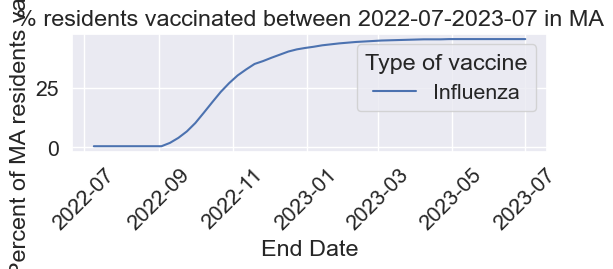

In [401]:
# Vaccination

plt.figure(figsize=(6,3))
plt.xticks(rotation=45)
sns.lineplot(immunization_data, x='End Date', y='Percent of MA residents vaccinated', hue='Type of vaccine').set(title='% residents vaccinated between 2022-07-2023-07 in MA');


## Influenza report analysis

In [402]:
influenza_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Season           322 non-null    object        
 1   Week Start Date  322 non-null    datetime64[ns]
 2   Week End Date    322 non-null    datetime64[ns]
 3   MMWR Week        322 non-null    int64         
 4   Activity type    322 non-null    object        
 5   Region Name      322 non-null    object        
 6   Activity level   322 non-null    object        
 7   Last updated     322 non-null    datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(4)
memory usage: 20.3+ KB


In [403]:
influenza_report.describe()

Week Start Date        Week End Date   MMWR Week  \
count                  322                  322  322.000000   
mean   2023-12-06 12:00:00  2023-12-12 12:00:00   26.891304   
min    2023-07-02 00:00:00  2023-07-08 00:00:00    1.000000   
25%    2023-09-17 00:00:00  2023-09-23 00:00:00   12.000000   
50%    2023-12-06 12:00:00  2023-12-12 12:00:00   29.500000   
75%    2024-02-25 00:00:00  2024-03-02 00:00:00   41.000000   
max    2024-05-12 00:00:00  2024-05-18 00:00:00   52.000000   
std                    NaN                  NaN   15.928305   

              Last updated  
count                  322  
mean   2024-05-23 00:00:00  
min    2024-05-23 00:00:00  
25%    2024-05-23 00:00:00  
50%    2024-05-23 00:00:00  
75%    2024-05-23 00:00:00  
max    2024-05-23 00:00:00  
std                    NaN

In [404]:
influenza_report.describe(include='object')

Season Activity type Region Name Activity level
count         322           322         322            322
unique          1             1           7              5
top     2023-2024           ILI      Boston        Minimal
freq          322           322          46            165

In [405]:
influenza_report.head()

Season Week Start Date Week End Date  MMWR Week Activity type  \
0  2023-2024      2023-07-02    2023-07-08         27           ILI   
1  2023-2024      2023-07-02    2023-07-08         27           ILI   
2  2023-2024      2023-07-02    2023-07-08         27           ILI   
3  2023-2024      2023-07-02    2023-07-08         27           ILI   
4  2023-2024      2023-07-02    2023-07-08         27           ILI   

          Region Name Activity level Last updated  
0              Boston        Minimal   2024-05-23  
1             Central        Minimal   2024-05-23  
2  Inner Metro Boston        Minimal   2024-05-23  
3           Northeast        Minimal   2024-05-23  
4  Outer Metro Boston        Minimal   2024-05-23

In [406]:
# Begin and end dates
print("Week start date initial:", influenza_report['Week Start Date'].min(), "\nWeek start date last:", influenza_report['Week Start Date'].max())


Week start date initial: 2023-07-02 00:00:00 
Week start date last: 2024-05-12 00:00:00


In [407]:
# Begin and end dates
print("Week end date initial:", influenza_report['Week End Date'].min(), "\nWeek end date last:", influenza_report['Week End Date'].max())


Week end date initial: 2023-07-08 00:00:00 
Week end date last: 2024-05-18 00:00:00


In [408]:
influenza_report['Region Name'].value_counts()

Region Name
Boston                46
Central               46
Inner Metro Boston    46
Northeast             46
Outer Metro Boston    46
Southeast             46
West                  46
Name: count, dtype: int64

In [409]:
influenza_report['Activity level'].value_counts()

Activity level
Minimal      165
High          83
Low           31
Moderate      27
Very High     16
Name: count, dtype: int64

In [410]:
influenza_report['MMWR Week'].value_counts()

MMWR Week
27    7
9     7
52    7
1     7
2     7
3     7
4     7
5     7
6     7
7     7
8     7
10    7
28    7
11    7
12    7
13    7
14    7
15    7
16    7
17    7
18    7
19    7
51    7
50    7
49    7
48    7
29    7
30    7
31    7
32    7
33    7
34    7
35    7
36    7
37    7
38    7
39    7
40    7
41    7
42    7
43    7
44    7
45    7
46    7
47    7
20    7
Name: count, dtype: int64

In [411]:
# Ordering for plot
influenza_report['level']=influenza_report['Activity level'].replace({'Minimal':0, 'Low': 1, 'Moderate': 2, 'High':3, 'Very High':4})
influenza_report.sort_values(by='level')

Season Week Start Date Week End Date  MMWR Week Activity type  \
0    2023-2024      2023-07-02    2023-07-08         27           ILI   
106  2023-2024      2023-10-15    2023-10-21         42           ILI   
107  2023-2024      2023-10-15    2023-10-21         42           ILI   
108  2023-2024      2023-10-15    2023-10-21         42           ILI   
109  2023-2024      2023-10-15    2023-10-21         42           ILI   
..         ...             ...           ...        ...           ...   
183  2023-2024      2023-12-31    2024-01-06          1           ILI   
185  2023-2024      2023-12-31    2024-01-06          1           ILI   
187  2023-2024      2023-12-31    2024-01-06          1           ILI   
222  2023-2024      2024-02-04    2024-02-10          6           ILI   
194  2023-2024      2024-01-07    2024-01-13          2           ILI   

            Region Name Activity level Last updated  level  
0                Boston        Minimal   2024-05-23      0  
106             Central        Minimal   2024-05-23      0  
107  Inner Metro Boston        Minimal   2024-05-23      0  
108           Northeast        Minimal   2024-05-23      0  
109  Outer Metro Boston        Minimal   2024-05-23      0  
..                  ...            ...          ...    ...  
183             Central      Very High   2024-05-23      4  
185           Northeast      Very High   2024-05-23      4  
187           Southeast      Very High   2024-05-23      4  
222           Southeast      Very High   2024-05-23      4  
194           Southeast      Very High   2024-05-23      4  

[322 rows x 9 columns]

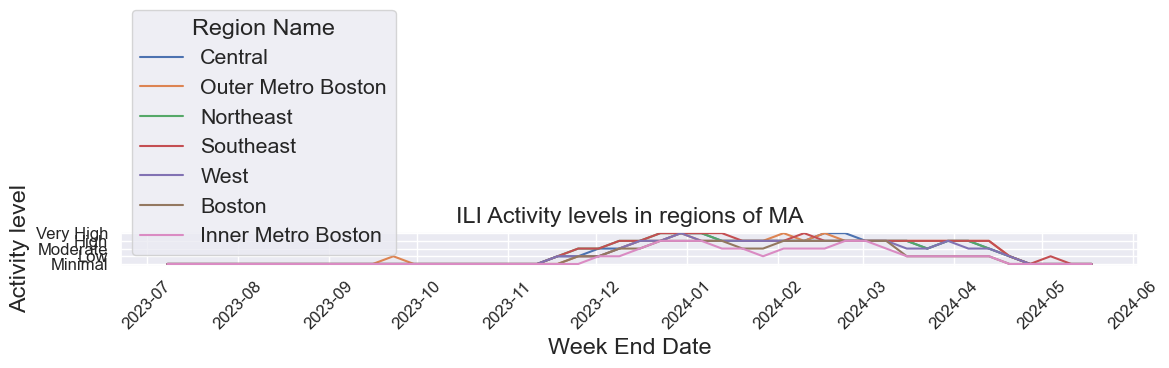

In [412]:
# Vaccination
# Create a count plot of survey responses
# order=['Minimal', 'Low', 'Moderate', 'High', 'Very High']
plt.figure(figsize=(12,3))
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
sns.lineplot(influenza_report.sort_values(by='level', ascending=False), x='Week End Date', y='Activity level',  hue='Region Name' ).set(title='ILI Activity levels in regions of MA');


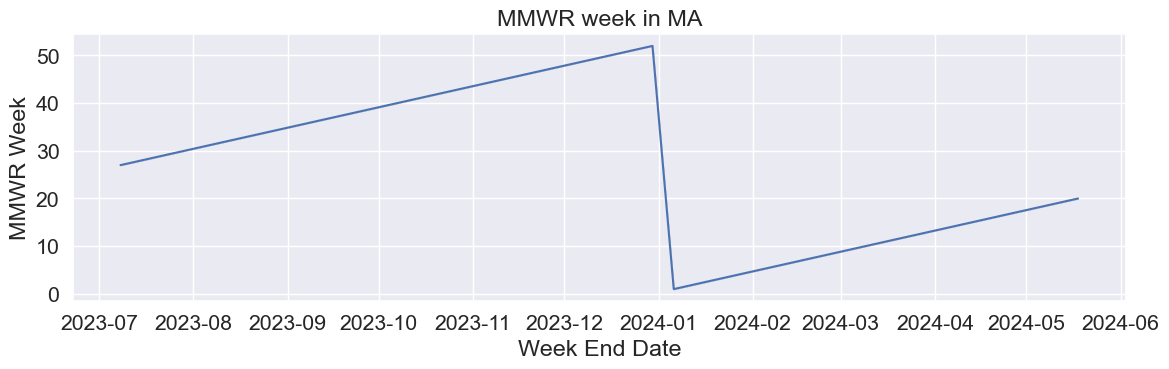

In [413]:
# Vaccination
plt.figure(figsize=(12,4))
sns.lineplot(influenza_report, x='Week End Date', y='MMWR Week').set(title='MMWR week in MA');


## Merging datasets for understanding correlations.

* All merges with season and date

In [414]:
# covid_flu_levels # Split ed visits and admissions. 'Severity level type'
# respiratory_report # split 'Visit type' - Two groups created ED_visits, Hospital_admissions
# wastewater_report # 46 no split.
# covid_report # cases and death data 46
# vaccination # 23-24 yearly data, final status 2024-06
# immunization # 23-24 yearly. final status 2024-05
# influenza_report # mmwr data, 2023-2024-06

In [415]:
covid_flu_levels.columns, covid_flu_levels.shape

(Index(['Season', 'Week Start Date', 'Week End Date', 'Severity level type',
        'Percent of all visits for broad acute respiratory syndrome',
        'Severity Level', 'Last updated'],
       dtype='object'),
 (138, 7))

In [416]:
covid_flu_levels['Severity level type'].value_counts()

Severity level type
COVID-19 ED visits              46
COVID-19 Hospital Admissions    46
Influenza                       46
Name: count, dtype: int64

In [417]:
# Splitting to merge only covid data
covid_ed_visits=covid_flu_levels[covid_flu_levels['Severity level type']=='COVID-19 ED visits']
covid_hospital_visits=covid_flu_levels[covid_flu_levels['Severity level type']=='COVID-19 Hospital Admissions']
# influenza_visits=covid_flu_levels[covid_flu_levels['Severity level type']=='Influenza']

In [418]:
covid_ed_visits.head(2)

Season Week Start Date Week End Date Severity level type  \
0  2023-2024      2023-07-02    2023-07-08  COVID-19 ED visits   
1  2023-2024      2024-02-04    2024-02-10  COVID-19 ED visits   

   Percent of all visits for broad acute respiratory syndrome Severity Level  \
0                                              0.082                 Minimal   
1                                              0.164                     Low   

  Last updated  
0   2024-05-23  
1   2024-05-23

In [419]:
covid_ed_visits=covid_ed_visits.rename(columns={'Percent of all visits for broad acute respiratory syndrome':'ED visits percent'})
covid_hospital_visits=covid_hospital_visits.rename(columns={'Percent of all visits for broad acute respiratory syndrome':'Hospital admissions percent'})
# influenza_influenza_visitsvisits.rename(columns={'Percent of all visits for broad acute respiratory syndrome':'Influenza'})

covid_ed_visits=covid_ed_visits.rename(columns={'Severity Level':'ED visits severity'})
covid_hospital_visits=covid_hospital_visits.rename(columns={'Severity Level':'Hospital admissions severity'})



In [420]:
covid_ed_visits.head(2)

Season Week Start Date Week End Date Severity level type  \
0  2023-2024      2023-07-02    2023-07-08  COVID-19 ED visits   
1  2023-2024      2024-02-04    2024-02-10  COVID-19 ED visits   

   ED visits percent ED visits severity Last updated  
0              0.082            Minimal   2024-05-23  
1              0.164                Low   2024-05-23

In [421]:
covid_ed_visits=covid_ed_visits.drop('Severity level type',axis=1)

In [422]:
covid_hospital_visits.head(2)

Season Week Start Date Week End Date           Severity level type  \
46  2023-2024      2023-07-02    2023-07-08  COVID-19 Hospital Admissions   
47  2023-2024      2024-02-04    2024-02-10  COVID-19 Hospital Admissions   

    Hospital admissions percent Hospital admissions severity Last updated  
46                        0.130                          Low   2024-05-23  
47                        0.202                          Low   2024-05-23

In [423]:
covid_hospital_visits=covid_hospital_visits.drop('Severity level type',axis=1)

In [424]:
# Merging the two
master=pd.merge(covid_ed_visits,covid_hospital_visits, on=['Season', 'Week Start Date', 'Week End Date', 'Last updated'], how='outer' )


In [425]:
master.head(2)

Season Week Start Date Week End Date  ED visits percent  \
0  2023-2024      2023-07-02    2023-07-08              0.082   
1  2023-2024      2023-07-09    2023-07-15              0.080   

  ED visits severity Last updated  Hospital admissions percent  \
0            Minimal   2024-05-23                        0.130   
1            Minimal   2024-05-23                        0.131   

  Hospital admissions severity  
0                          Low  
1                          Low

In [426]:
respiratory_report.columns, respiratory_report.shape

(Index(['Season', 'Week Start Date', 'Week End Date', 'Visit type',
        'Percent of all visits for acute respiratory disease',
        'Percent of all visits for COVID-19', 'Percent of all visits for RSV',
        'Percent of all visits for influenza', 'Last updated'],
       dtype='object'),
 (92, 9))

In [427]:
respiratory_report['Visit type'].value_counts()

Visit type
ED visits              46
Hospital admissions    46
Name: count, dtype: int64

In [428]:
ED_visit_report=respiratory_report[respiratory_report['Visit type']=='ED visits']
Hospital_admissions_report=respiratory_report[respiratory_report['Visit type']=='Hospital admissions']

In [429]:
ED_visit_report.head(2)

Season Week Start Date Week End Date Visit type  \
0  2023-2024      2023-07-02    2023-07-08  ED visits   
1  2023-2024      2024-02-04    2024-02-10  ED visits   

   Percent of all visits for acute respiratory disease  \
0                                              0.082     
1                                              0.164     

   Percent of all visits for COVID-19  Percent of all visits for RSV  \
0                               0.005                          0.000   
1                               0.019                          0.002   

   Percent of all visits for influenza Last updated  
0                                0.001   2024-05-23  
1                                0.030   2024-05-23

In [430]:
ED_visit_report=ED_visit_report.rename(columns=({'Percent of all visits for acute respiratory disease': '% ED visits acute respiratory disease','Percent of all visits for COVID-19': '% ED Visits covid',
                                                 'Percent of all visits for RSV': '% ED visits rsv', 'Percent of all visits for influenza': '% ED visits influenza'}))

In [431]:
ED_visit_report.head(2)

Season Week Start Date Week End Date Visit type  \
0  2023-2024      2023-07-02    2023-07-08  ED visits   
1  2023-2024      2024-02-04    2024-02-10  ED visits   

   % ED visits acute respiratory disease  % ED Visits covid  % ED visits rsv  \
0                                  0.082              0.005            0.000   
1                                  0.164              0.019            0.002   

   % ED visits influenza Last updated  
0                  0.001   2024-05-23  
1                  0.030   2024-05-23

In [432]:
ED_visit_report=ED_visit_report.drop('Visit type', axis=1)

In [433]:
Hospital_admissions_report=Hospital_admissions_report.rename(columns=({'Percent of all visits for acute respiratory disease': '% Admission acute respiratory disease','Percent of all visits for COVID-19': '% Admissions covid',
                                                 'Percent of all visits for RSV': '% Admissions rsv', 'Percent of all visits for influenza': '% Admissions influenza'}))

In [434]:
Hospital_admissions_report.head(2)

Season Week Start Date Week End Date           Visit type  \
46  2023-2024      2023-07-02    2023-07-08  Hospital admissions   
47  2023-2024      2024-02-04    2024-02-10  Hospital admissions   

    % Admission acute respiratory disease  % Admissions covid  \
46                                  0.130               0.008   
47                                  0.202               0.029   

    % Admissions rsv  % Admissions influenza Last updated  
46             0.000                   0.001   2024-05-23  
47             0.004                   0.025   2024-05-23

In [435]:
Hospital_admissions_report=Hospital_admissions_report.drop('Visit type', axis=1)

In [436]:
# Merging the master

master_1=master.merge(Hospital_admissions_report, on=['Season', 'Week Start Date', 'Week End Date', 'Last updated'])

In [437]:
master_2=master_1.merge(ED_visit_report, on=['Season', 'Week Start Date', 'Week End Date', 'Last updated'])

In [438]:
wastewater_report.columns, wastewater_report.shape

(Index(['Week Start Date', 'Week End Date',
        'Number of samples where SARS-CoV-2 was detected', 'Last updated',
        'Statewide average effective SARS-CoV-2 concentration'],
       dtype='object'),
 (47, 5))

In [439]:
master_3=master_2.merge(wastewater_report, on=['Week Start Date', 'Week End Date', 'Last updated'])

In [440]:
covid_report.columns, covid_report.shape

(Index(['Week Start Date', 'Week End Date', 'Confirmed and probable deaths',
        'Confirmed and probable cases', 'Last updated'],
       dtype='object'),
 (46, 5))

In [441]:
master_4= master_3.merge(covid_report, on=['Week Start Date', 'Week End Date', 'Last updated'])

In [442]:
vaccination.columns, vaccination.shape

(Index(['Season', 'Start Date', 'End Date', 'Type of vaccine', 'Group',
        'Subgroup', 'Population', 'Percent of MA total population vaccinated',
        'Last updated'],
       dtype='object'),
 (92, 9))

In [443]:
influenza_report.columns, influenza_report.shape

(Index(['Season', 'Week Start Date', 'Week End Date', 'MMWR Week',
        'Activity type', 'Region Name', 'Activity level', 'Last updated',
        'level'],
       dtype='object'),
 (322, 9))

In [444]:
influenza_report['Region Name'].value_counts()

Region Name
Boston                46
Central               46
Inner Metro Boston    46
Northeast             46
Outer Metro Boston    46
Southeast             46
West                  46
Name: count, dtype: int64

In [445]:
master_4.columns

Index(['Season', 'Week Start Date', 'Week End Date', 'ED visits percent',
       'ED visits severity', 'Last updated', 'Hospital admissions percent',
       'Hospital admissions severity', '% Admission acute respiratory disease',
       '% Admissions covid', '% Admissions rsv', '% Admissions influenza',
       '% ED visits acute respiratory disease', '% ED Visits covid',
       '% ED visits rsv', '% ED visits influenza',
       'Number of samples where SARS-CoV-2 was detected',
       'Statewide average effective SARS-CoV-2 concentration',
       'Confirmed and probable deaths', 'Confirmed and probable cases'],
      dtype='object')

In [446]:
master_4.head()

Season Week Start Date Week End Date  ED visits percent  \
0  2023-2024      2023-07-02    2023-07-08              0.082   
1  2023-2024      2023-07-09    2023-07-15              0.080   
2  2023-2024      2023-07-16    2023-07-22              0.080   
3  2023-2024      2023-07-23    2023-07-29              0.080   
4  2023-2024      2023-07-30    2023-08-05              0.083   

  ED visits severity Last updated  Hospital admissions percent  \
0            Minimal   2024-05-23                        0.130   
1            Minimal   2024-05-23                        0.131   
2            Minimal   2024-05-23                        0.134   
3            Minimal   2024-05-23                        0.129   
4            Minimal   2024-05-23                        0.131   

  Hospital admissions severity  % Admission acute respiratory disease  \
0                          Low                                  0.130   
1                          Low                                  0.131   
2                          Low                                  0.134   
3                          Low                                  0.129   
4                          Low                                  0.131   

   % Admissions covid  % Admissions rsv  % Admissions influenza  \
0               0.008               0.0                   0.001   
1               0.010               0.0                   0.000   
2               0.012               0.0                   0.001   
3               0.013               0.0                   0.000   
4               0.015               0.0                   0.001   

   % ED visits acute respiratory disease  % ED Visits covid  % ED visits rsv  \
0                                  0.082              0.005              0.0   
1                                  0.080              0.006              0.0   
2                                  0.080              0.007              0.0   
3                                  0.080              0.009              0.0   
4                                  0.083              0.010              0.0   

   % ED visits influenza  Number of samples where SARS-CoV-2 was detected  \
0                  0.001                                               75   
1                  0.000                                               97   
2                  0.000                                               94   
3                  0.000                                               87   
4                  0.001                                               90   

   Statewide average effective SARS-CoV-2 concentration  \
0                                      212659.407869      
1                                      410604.937610      
2                                      261716.734110      
3                                      406865.101885      
4                                      439943.142381      

   Confirmed and probable deaths  Confirmed and probable cases  
0                              8                           846  
1                              8                           972  
2                              9                          1146  
3                              7                          1488  
4                              2                          1739

In [447]:
master_4=master_4.drop(columns=['Season', 'Week Start Date', 'Week End Date', '% Admission acute respiratory disease', 'Last updated', '% ED visits acute respiratory disease'])


In [448]:
master_4=master_4.drop(columns=['% Admissions rsv', '% Admissions influenza', '% ED visits rsv' , '% ED visits influenza'])

In [449]:
master_4=master_4.drop(columns=['Hospital admissions percent', 'ED visits percent'])

In [450]:
master_4.head()

ED visits severity Hospital admissions severity  % Admissions covid  \
0            Minimal                          Low               0.008   
1            Minimal                          Low               0.010   
2            Minimal                          Low               0.012   
3            Minimal                          Low               0.013   
4            Minimal                          Low               0.015   

   % ED Visits covid  Number of samples where SARS-CoV-2 was detected  \
0              0.005                                               75   
1              0.006                                               97   
2              0.007                                               94   
3              0.009                                               87   
4              0.010                                               90   

   Statewide average effective SARS-CoV-2 concentration  \
0                                      212659.407869      
1                                      410604.937610      
2                                      261716.734110      
3                                      406865.101885      
4                                      439943.142381      

   Confirmed and probable deaths  Confirmed and probable cases  
0                              8                           846  
1                              8                           972  
2                              9                          1146  
3                              7                          1488  
4                              2                          1739

## Feature engineering

In [451]:
master_4['ED visits severity'].unique()

array(['Minimal', 'Low', 'Moderate', 'Substantial'], dtype=object)

In [452]:
master_4['Hospital admissions severity']=master_4['Hospital admissions severity'].replace({'Low':0, 'Medium':1})
master_4['ED visits severity']=master_4['ED visits severity'].replace({'Minimal':0, 'Low':1, 'Moderate':2, 'Medium':3, 'High':4, 'Substantial':5})



In [453]:
master_4.head()

ED visits severity  Hospital admissions severity  % Admissions covid  \
0                   0                             0               0.008   
1                   0                             0               0.010   
2                   0                             0               0.012   
3                   0                             0               0.013   
4                   0                             0               0.015   

   % ED Visits covid  Number of samples where SARS-CoV-2 was detected  \
0              0.005                                               75   
1              0.006                                               97   
2              0.007                                               94   
3              0.009                                               87   
4              0.010                                               90   

   Statewide average effective SARS-CoV-2 concentration  \
0                                      212659.407869      
1                                      410604.937610      
2                                      261716.734110      
3                                      406865.101885      
4                                      439943.142381      

   Confirmed and probable deaths  Confirmed and probable cases  
0                              8                           846  
1                              8                           972  
2                              9                          1146  
3                              7                          1488  
4                              2                          1739

In [454]:
# Function for scaling
def normalize(x):
    return [(i - min(x)) / (max(x) - min(x)) for i in x]


In [455]:
# Min max scaling for all numerics
master_4['ED visits severity']= normalize(master_4['ED visits severity'])
master_4['Hospital admissions severity']= normalize(master_4['Hospital admissions severity'])
master_4['Number of samples where SARS-CoV-2 was detected']= normalize(master_4['Number of samples where SARS-CoV-2 was detected'])
master_4['Statewide average effective SARS-CoV-2 concentration']= normalize(master_4['Statewide average effective SARS-CoV-2 concentration'])
master_4['Confirmed and probable deaths']= normalize(master_4['Confirmed and probable deaths'])
master_4['Confirmed and probable cases']= normalize(master_4['Confirmed and probable cases'])


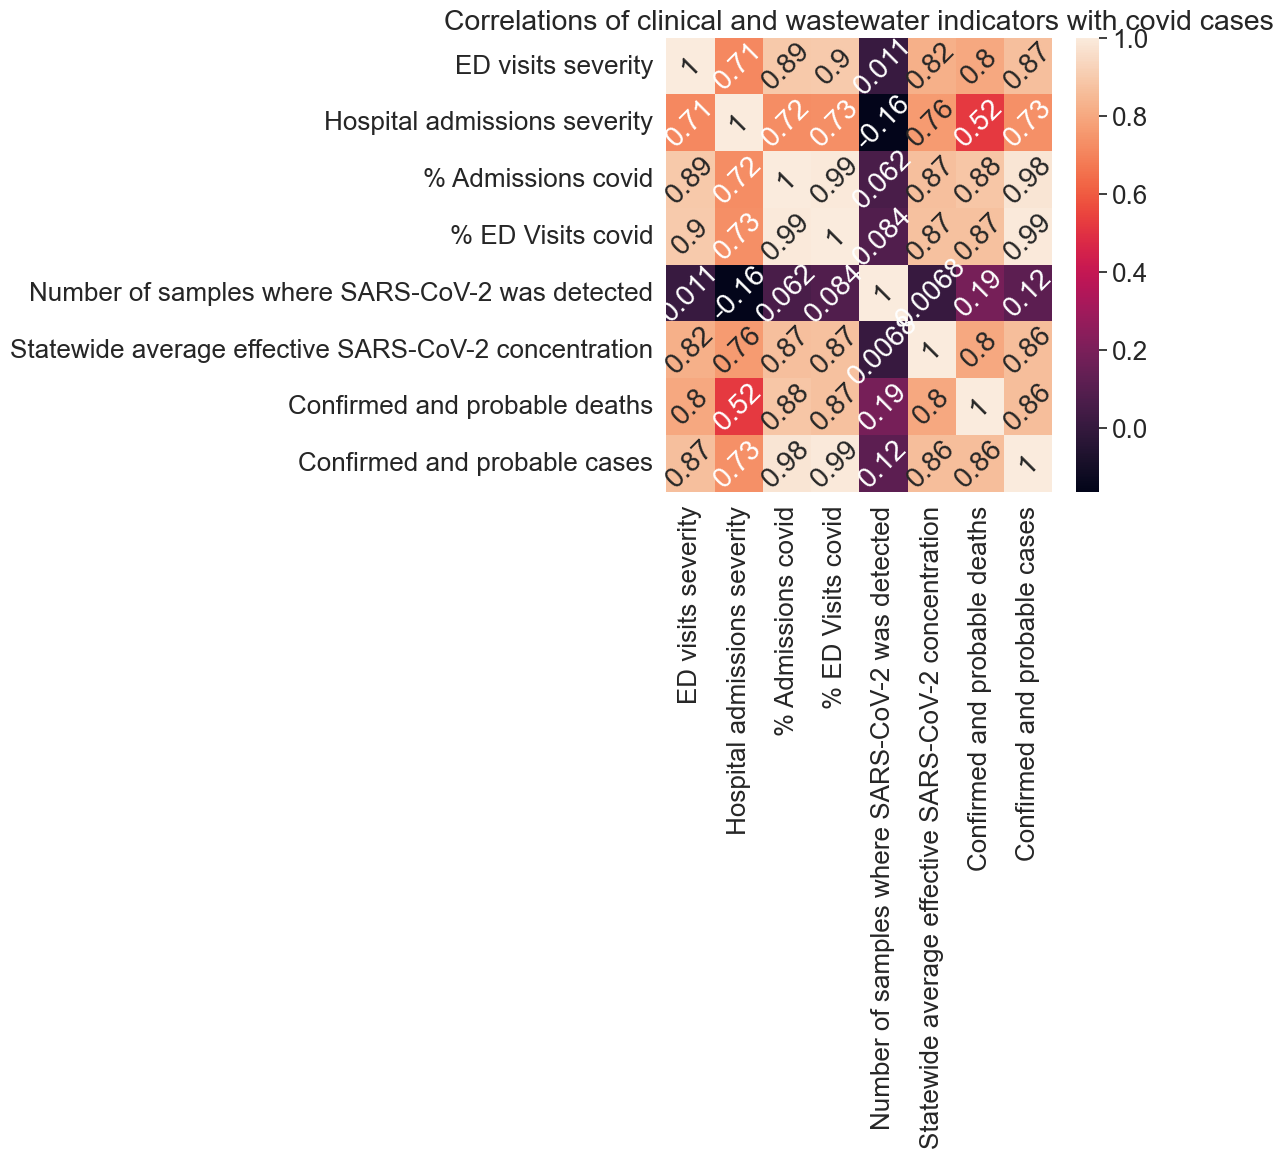

In [456]:
plt.figure(figsize=(12,12))
sns.set(font_scale=1.7)
sns.heatmap(master_4.corr(), annot=True, annot_kws={ "rotation": 45}).set(title='Correlations of clinical and wastewater indicators with covid cases');

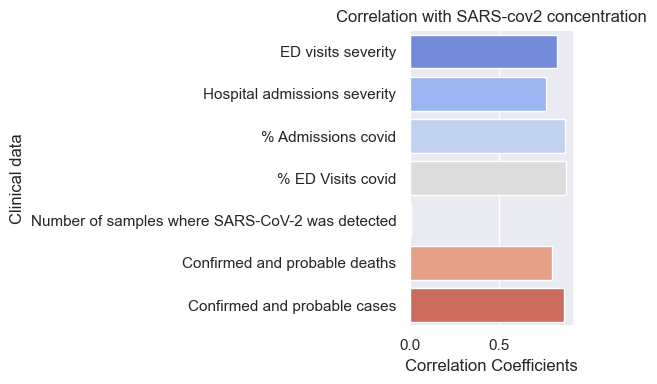

In [457]:
wastewater_correlation = master_4.corr()['Statewide average effective SARS-CoV-2 concentration'].drop(['Statewide average effective SARS-CoV-2 concentration'])
plt.figure(figsize=(6,4))
sns.set(font_scale=1)
plt.title('Correlation with SARS-cov2 concentration')
plt.xlabel('Correlation Coefficients')
plt.ylabel('Clinical data')
sns.barplot(x=wastewater_correlation.values, y=wastewater_correlation.index, palette='coolwarm')
plt.show();

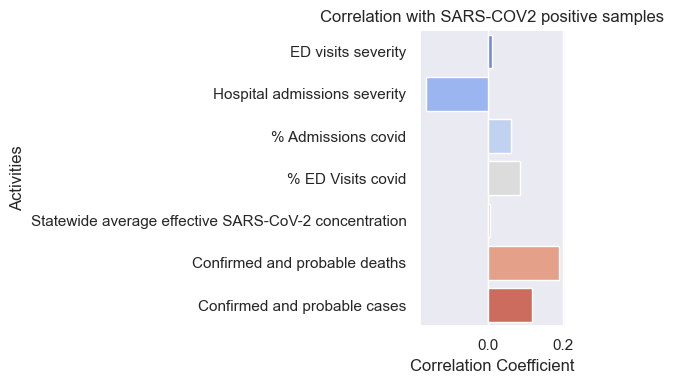

In [458]:
SampleNum_correlation = master_4.corr()['Number of samples where SARS-CoV-2 was detected'].drop(['Number of samples where SARS-CoV-2 was detected'])
plt.figure(figsize=(6,4))
sns.set(font_scale=1)
plt.title('Correlation with SARS-COV2 positive samples')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Activities')
sns.barplot(x=SampleNum_correlation.values, y=SampleNum_correlation.index, palette='coolwarm')
plt.show();

## Respiratory historical data

In [459]:
# Importing current and historic sheets

df=pd.read_excel("respiratory-disease-data-reporting-05-23-24.xlsx", 'Historic demographic data') # Imported earlier

df1 = pd.read_excel('respiratory-disease-data-reporting-05-23-24.xlsx', sheet_name="Visits by week")

df2 = pd.read_excel('respiratory-disease-data-reporting-05-23-24.xlsx', sheet_name="Previous Seasons by Week")


In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Season                                                222 non-null    object        
 1   Start Date                                            222 non-null    datetime64[ns]
 2   End Date                                              222 non-null    datetime64[ns]
 3   Visit type                                            222 non-null    object        
 4   Group                                                 222 non-null    object        
 5   Subgroup                                              222 non-null    object        
 6   Rate of broad acute respiratory visits (per 100,000)  222 non-null    object        
 7   Population                                            172 non-null    float64   

In [461]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 12 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Season                                                92 non-null     object        
 1   Week Start Date                                       92 non-null     datetime64[ns]
 2   Week End Date                                         92 non-null     datetime64[ns]
 3   Visit type                                            92 non-null     object        
 4   COVID Severity Level                                  92 non-null     object        
 5   Total visits                                          92 non-null     int64         
 6   Percent of visits for acute respiratory diseases      92 non-null     float64       
 7   Percent of all visits for COVID-19                    92 non-null     float64     

In [462]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Season                                            418 non-null    object        
 1   Visit type                                        418 non-null    object        
 2   Week Start Date                                   418 non-null    datetime64[ns]
 3   Week End Date                                     418 non-null    datetime64[ns]
 4   Total visits                                      418 non-null    int64         
 5   Percent of visits for acute respiratory diseases  418 non-null    float64       
 6   Percent of visits for COVID-19                    418 non-null    float64       
 7   Percent of visits for influenza                   418 non-null    float64       
 8   Percent of visits for RSV     

In [463]:
df1.Season.unique()

array(['2023-2024'], dtype=object)

In [464]:
df1['Visit type'].value_counts()

Visit type
ED visits     46
Admissions    46
Name: count, dtype: int64

In [465]:
df2.Season.unique()

array(['2022-2023', '2020-2021', '2021-2022', '2019-2020'], dtype=object)

In [466]:
df2['Visit type'].value_counts()

Visit type
ED Visit     209
Admission    209
Name: count, dtype: int64

In [467]:
for i in df2.Season.unique():
  for j in df2['Visit type'].unique():
     print("Data for season and visit type:", i, j )
     print(df2[(df2.Season== i) & (df2['Visit type']==j)].info())

Data for season and visit type: 2022-2023 ED Visit
<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Season                                            52 non-null     object        
 1   Visit type                                        52 non-null     object        
 2   Week Start Date                                   52 non-null     datetime64[ns]
 3   Week End Date                                     52 non-null     datetime64[ns]
 4   Total visits                                      52 non-null     int64         
 5   Percent of visits for acute respiratory diseases  52 non-null     float64       
 6   Percent of visits for COVID-19                    52 non-null     float64       
 7   Percent of visits for influenza                   52 non-null     float

## Concatenation of two sets df1 and df2 - Covid_series for all the seasons for time_series analysis

In [468]:
df1.columns

Index(['Season', 'Week Start Date', 'Week End Date', 'Visit type',
       'COVID Severity Level', 'Total visits',
       'Percent of visits for acute respiratory diseases',
       'Percent of all visits for COVID-19', 'Percent of all visits for RSV',
       'Percent of all visits for influenza',
       'Estimated number of acute respiratory disease visits', 'Last updated'],
      dtype='object')

In [469]:
df2.columns

Index(['Season', 'Visit type', 'Week Start Date', 'Week End Date',
       'Total visits', 'Percent of visits for acute respiratory diseases',
       'Percent of visits for COVID-19', 'Percent of visits for influenza',
       'Percent of visits for RSV', 'Last updated'],
      dtype='object')

In [470]:
# Renaming columns in df2 to make them same
df2=df2.rename(columns=({'Percent of visits for COVID-19':'Percent of all visits for COVID-19', 'Percent of visits for influenza':'Percent of all visits for influenza', 'Percent of visits for RSV':'Percent of all visits for RSV' }))

In [471]:
# Extracting only common columns to concat
Covid_series=pd.concat([df1[['Season', 'Visit type', 'Week Start Date', 'Week End Date',
      'Total visits', 'Percent of visits for acute respiratory diseases',
       'Percent of all visits for COVID-19', 'Percent of all visits for influenza',
       'Percent of all visits for RSV', 'Last updated']],
                        df2[['Season', 'Visit type', 'Week Start Date', 'Week End Date',
      'Total visits', 'Percent of visits for acute respiratory diseases',
       'Percent of all visits for COVID-19', 'Percent of all visits for influenza',
       'Percent of all visits for RSV', 'Last updated']]])

In [472]:
Covid_series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 417
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Season                                            510 non-null    object        
 1   Visit type                                        510 non-null    object        
 2   Week Start Date                                   510 non-null    datetime64[ns]
 3   Week End Date                                     510 non-null    datetime64[ns]
 4   Total visits                                      510 non-null    int64         
 5   Percent of visits for acute respiratory diseases  510 non-null    float64       
 6   Percent of all visits for COVID-19                510 non-null    float64       
 7   Percent of all visits for influenza               510 non-null    float64       
 8   Percent of all visits for RSV      

In [473]:
Covid_series.Season.unique()

array(['2023-2024', '2022-2023', '2020-2021', '2021-2022', '2019-2020'],
      dtype=object)

In [474]:
Covid_series['Visit type'].unique()

array(['ED visits', 'Admissions', 'ED Visit', 'Admission'], dtype=object)

In [475]:
# Converting the visits type to same
Covid_series['Visit type']=Covid_series['Visit type'].replace({'ED visits':'ED visits', 'ED Visit':'ED visits', 'Admissions':'Admissions', 'Admission': 'Admissions'})

In [476]:
# Verifying
Covid_series['Visit type'].unique()

array(['ED visits', 'Admissions'], dtype=object)

In [477]:

Covid_series['Percent of all visits for COVID-19'].describe()

count    510.000000
mean       0.030372
std        0.035205
min        0.000000
25%        0.006918
50%        0.022000
75%        0.040325
max        0.239301
Name: Percent of all visits for COVID-19, dtype: float64

In [478]:
Covid_series['Total visits'].describe()

count      510.000000
mean     36912.303922
std      24336.992395
min       8891.000000
25%      13479.250000
50%      24629.500000
75%      63635.750000
max      71616.000000
Name: Total visits, dtype: float64

In [479]:
Covid_series['covid_numbers']=round(Covid_series['Total visits']* (Covid_series['Percent of all visits for COVID-19']/100))
Covid_series['rsv_numbers']=round(Covid_series['Total visits']* (Covid_series['Percent of all visits for RSV']/100))
Covid_series['influenza_numbers']=round(Covid_series['Total visits']* (Covid_series['Percent of all visits for influenza']/100))

In [480]:
Covid_series['covid_numbers'].describe()

count    510.000000
mean       8.964706
std       11.661345
min        0.000000
25%        2.000000
50%        5.000000
75%       13.000000
max      116.000000
Name: covid_numbers, dtype: float64

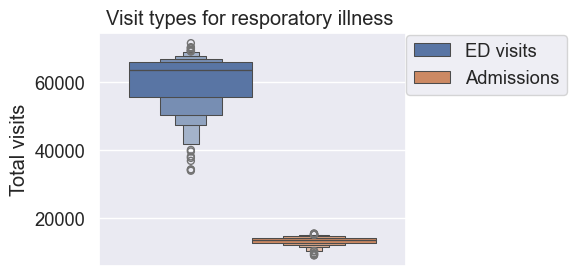

In [481]:
plt.figure(figsize=(6,3))
sns.set(font_scale=1.2)
sns.boxenplot(Covid_series, y='Total visits', hue='Visit type').set(title='Visit types for resporatory illness ');
# Put the legend out of the figure
plt.legend( bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0.);


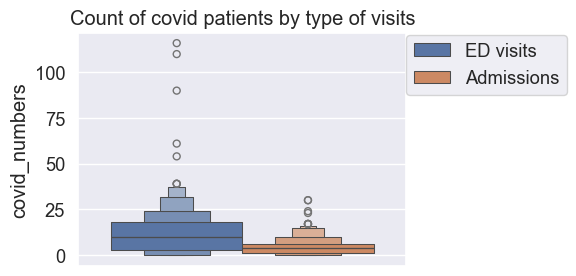

In [482]:
plt.figure(figsize=(6,3))
sns.set(font_scale=1.2)
sns.boxenplot(Covid_series, y='covid_numbers', hue='Visit type').set(title='Count of covid patients by type of visits');
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0.);

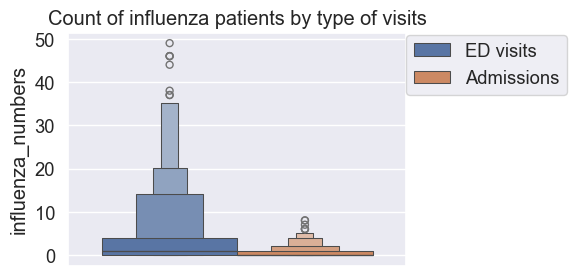

In [483]:
plt.figure(figsize=(6,3))
sns.set(font_scale=1.2)
sns.boxenplot(Covid_series, y='influenza_numbers', hue='Visit type').set(title='Count of influenza patients by type of visits');
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0.);

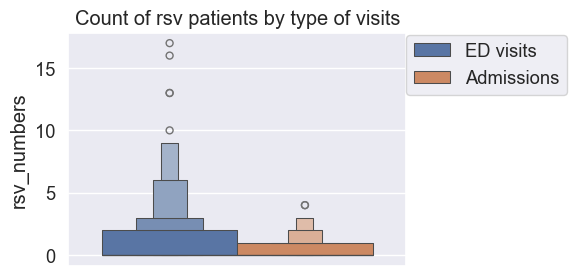

In [484]:
plt.figure(figsize=(6,3))
sns.boxenplot(Covid_series, y='rsv_numbers', hue='Visit type').set(title='Count of rsv patients by type of visits');
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0.);

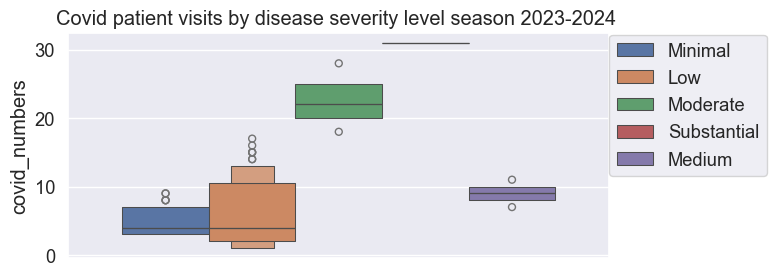

In [485]:
# Severity levels current data only from df1 for covid19 patients
df1['covid_numbers']=round(df1['Total visits']* (df1['Percent of all visits for COVID-19']/100))
plt.figure(figsize=(8,3))
sns.boxenplot(df1, y='covid_numbers', hue='COVID Severity Level').set(title='Covid patient visits by disease severity level season 2023-2024 ')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0.);

In [486]:
Covid_series.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 417
Data columns (total 13 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Season                                            510 non-null    object        
 1   Visit type                                        510 non-null    object        
 2   Week Start Date                                   510 non-null    datetime64[ns]
 3   Week End Date                                     510 non-null    datetime64[ns]
 4   Total visits                                      510 non-null    int64         
 5   Percent of visits for acute respiratory diseases  510 non-null    float64       
 6   Percent of all visits for COVID-19                510 non-null    float64       
 7   Percent of all visits for influenza               510 non-null    float64       
 8   Percent of all visits for RSV      

In [487]:
# Taking a copy for future analysis, without redoing all preprocessing
Covid_series.to_csv('Covid_series.csv')

# Wastewater analysis with historical data


In [488]:
tabs_wastewater = pd.ExcelFile("wastewater-dashboard-data-06-13-24.xlsx").sheet_names
print(tabs_wastewater)


['Introduction', 'Wastewater Testing Data', 'Sewer Area Detailed Data', 'Sewer Area Overview', 'FAQs', 'Data Dictionary', 'Additional Sewer Area Info']


In [489]:
Wastewater_data= pd.read_excel("wastewater-dashboard-data-06-13-24.xlsx", 'Wastewater Testing Data')

In [490]:
Wastewater_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13495 entries, 0 to 13494
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Tester                                     13495 non-null  object        
 1   Site type                                  13495 non-null  object        
 2   Name of Sampling Location                  13495 non-null  object        
 3   7 day average of SARS-CoV-2 concentration  13495 non-null  float64       
 4   Number of samples in the last 7 days       13495 non-null  int64         
 5   SARS-CoV-2 Detected                        13495 non-null  object        
 6   Sample collection date                     13495 non-null  datetime64[ns]
 7   Units (measuring concentration)            13495 non-null  object        
 8   City of sampling location                  13495 non-null  object        
 9   State of sampling

In [491]:
Wastewater_data.describe()

7 day average of SARS-CoV-2 concentration  \
count                               1.349500e+04   
mean                                9.038289e+05   
min                                 0.000000e+00   
25%                                 2.960477e+05   
50%                                 6.054873e+05   
75%                                 1.101800e+06   
max                                 5.024138e+07   
std                                 1.368547e+06   

       Number of samples in the last 7 days         Sample collection date  \
count                          13495.000000                          13495   
mean                               3.875361  2023-01-06 01:25:28.299370240   
min                                1.000000            2020-03-23 00:00:00   
25%                                3.000000            2022-06-08 00:00:00   
50%                                4.000000            2023-02-17 00:00:00   
75%                                4.000000            2023-10-06 00:00:00   
max                                7.000000            2024-06-10 00:00:00   
std                                1.774203                            NaN   

      Date data last updated  
count                  13495  
mean     2024-06-13 00:00:00  
min      2024-06-13 00:00:00  
25%      2024-06-13 00:00:00  
50%      2024-06-13 00:00:00  
75%      2024-06-13 00:00:00  
max      2024-06-13 00:00:00  
std                      NaN

In [492]:
Wastewater_data.describe(include='object')

Tester  Site type Name of Sampling Location SARS-CoV-2 Detected  \
count    13495      13495                     13495               13495   
unique       1          1                        39                   2   
top     BioBot  Municipal             MWRA Northern            Detected   
freq     13495      13495                      1399               13335   

       Units (measuring concentration) City of sampling location  \
count                            13495                     13495   
unique                               1                        34   
top                           copies/L                  Winthrop   
freq                             13495                      2797   

       State of sampling location County of sampling location  
count                       13495                       13495  
unique                          1                          12  
top                            MA                     Suffolk  
freq                        13495                        2797

In [493]:
Wastewater_data['SARS-CoV-2 Detected'].value_counts()

SARS-CoV-2 Detected
Detected        13335
Not Detected      160
Name: count, dtype: int64

In [494]:
Wastewater_data['Name of Sampling Location'].value_counts()

Name of Sampling Location
MWRA Northern                         1399
MWRA Southern                         1398
South Hadley Div. of WPC               584
Pittsfield WWTP                        572
Greater Lawrence Sanitary District     548
Upper Blackstone Clean Water           538
Brockton/ Abington                     524
Wareham WPCF                           484
SESD-Peabody/Salem Pump                467
SESD-Peabody Metering Station          435
Fall River WWTP                        432
Fitchburg Public Works                 427
Hull WWTF                              421
Haverhill WWTP                         405
Athol WWTP                             397
Uxbridge WWTF                          315
Amherst WWTP                           313
Billerica Treatment Plant              305
Plymouth Headworks Influent            298
Whitman                                282
S.Deerfield WWTP                       269
Provincetown Treatment Plant           268
Surfside WTF                

In [495]:
samples_by_date=pd.DataFrame(Wastewater_data[['Number of samples in the last 7 days', 'Sample collection date']].groupby('Sample collection date').sum()[['Number of samples in the last 7 days']]).reset_index()

In [496]:
samples_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Sample collection date                1480 non-null   datetime64[ns]
 1   Number of samples in the last 7 days  1480 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 23.3 KB


In [497]:
samples_by_date.head()

Sample collection date  Number of samples in the last 7 days
0             2020-03-23                                     2
1             2020-03-24                                     2
2             2020-03-25                                     5
3             2020-03-26                                     7
4             2020-03-27                                     9

In [498]:
Wastewater_data.columns

Index(['Tester', 'Site type', 'Name of Sampling Location',
       '7 day average of SARS-CoV-2 concentration',
       'Number of samples in the last 7 days', 'SARS-CoV-2 Detected',
       'Sample collection date', 'Units (measuring concentration)',
       'City of sampling location', 'State of sampling location',
       'County of sampling location', 'Date data last updated'],
      dtype='object')

In [499]:
Wastewater_data['SARS-CoV-2 Detected']=Wastewater_data['SARS-CoV-2 Detected'].replace({ 'Detected':0, 'Not Detected':1})

In [500]:
Cov_detected_counts=pd.DataFrame(Wastewater_data[['SARS-CoV-2 Detected', 'Sample collection date']].groupby('Sample collection date').sum()[['SARS-CoV-2 Detected']]).reset_index()

In [501]:

samples_by_date=pd.DataFrame(Wastewater_data[['Number of samples in the last 7 days', 'Sample collection date']].groupby('Sample collection date').sum()[['Number of samples in the last 7 days']]).reset_index()

In [502]:
conc_by_date=pd.DataFrame(Wastewater_data[['7 day average of SARS-CoV-2 concentration', 'Sample collection date']].groupby('Sample collection date').mean()['7 day average of SARS-CoV-2 concentration']).reset_index()

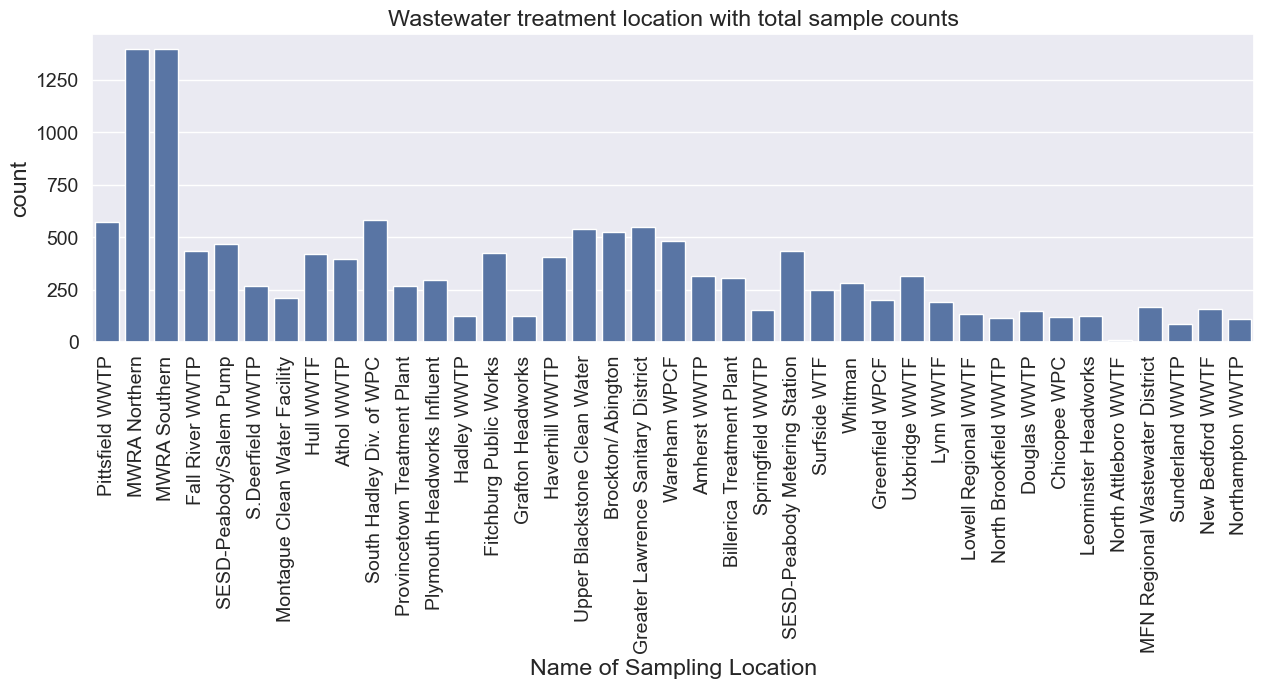

In [503]:
plt.figure(figsize=(15,4))
sns.set(font_scale=(1.4))
sns.countplot(Wastewater_data, x='Name of Sampling Location').set(title='Wastewater treatment location with total sample counts')
plt.xticks(rotation=90, fontsize=14);
plt.yticks(fontsize=14);

In [504]:
conc_by_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 2 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Sample collection date                     1480 non-null   datetime64[ns]
 1   7 day average of SARS-CoV-2 concentration  1480 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.3 KB


In [505]:
wastewater_samples_data=pd.merge(samples_by_date, conc_by_date, on='Sample collection date', how='outer')

In [506]:
wastewater_samples_data=pd.merge(wastewater_samples_data, Cov_detected_counts, on='Sample collection date', how='outer')

In [507]:
wastewater_samples_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Sample collection date                     1480 non-null   datetime64[ns]
 1   Number of samples in the last 7 days       1480 non-null   int64         
 2   7 day average of SARS-CoV-2 concentration  1480 non-null   float64       
 3   SARS-CoV-2 Detected                        1480 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 46.4 KB


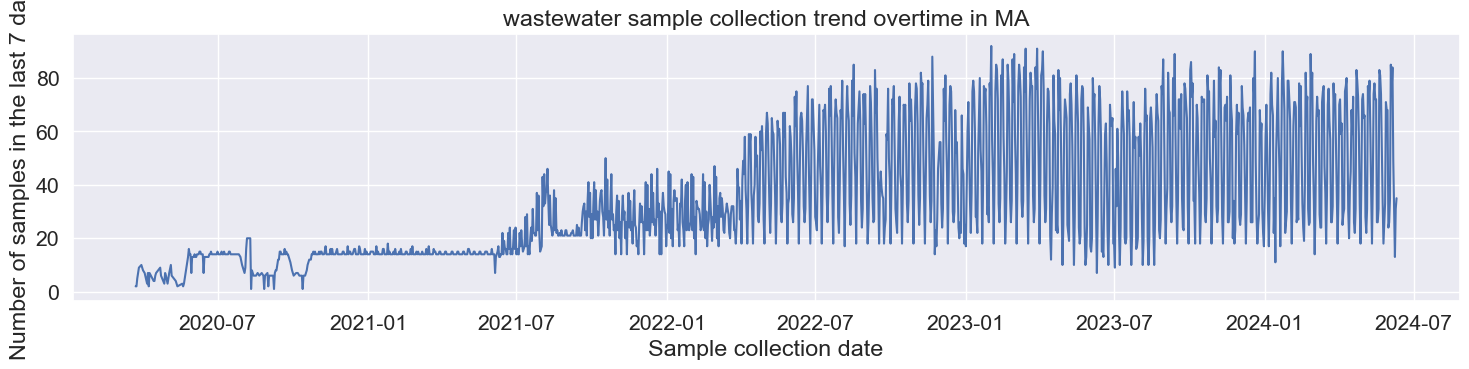

In [508]:
# Comparison overtime with clinical data
plt.figure(figsize=(15,4))
sns.lineplot(samples_by_date, x='Sample collection date', y='Number of samples in the last 7 days').set(title='wastewater sample collection trend overtime in MA');


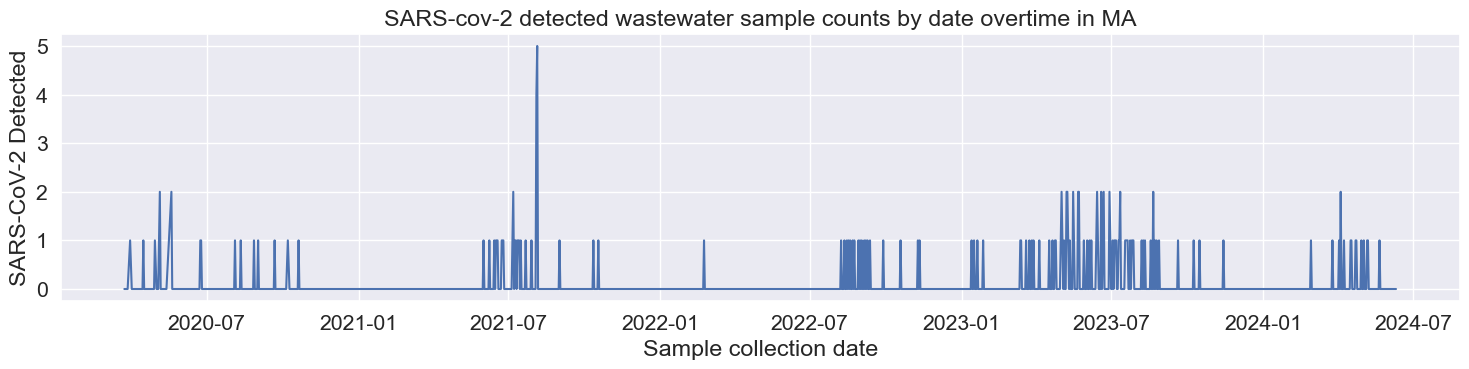

In [509]:
# Comparison overtime with clinical data
plt.figure(figsize=(15,4))
sns.lineplot(wastewater_samples_data, x='Sample collection date', y='SARS-CoV-2 Detected').set(title='SARS-cov-2 detected wastewater sample counts by date overtime in MA');


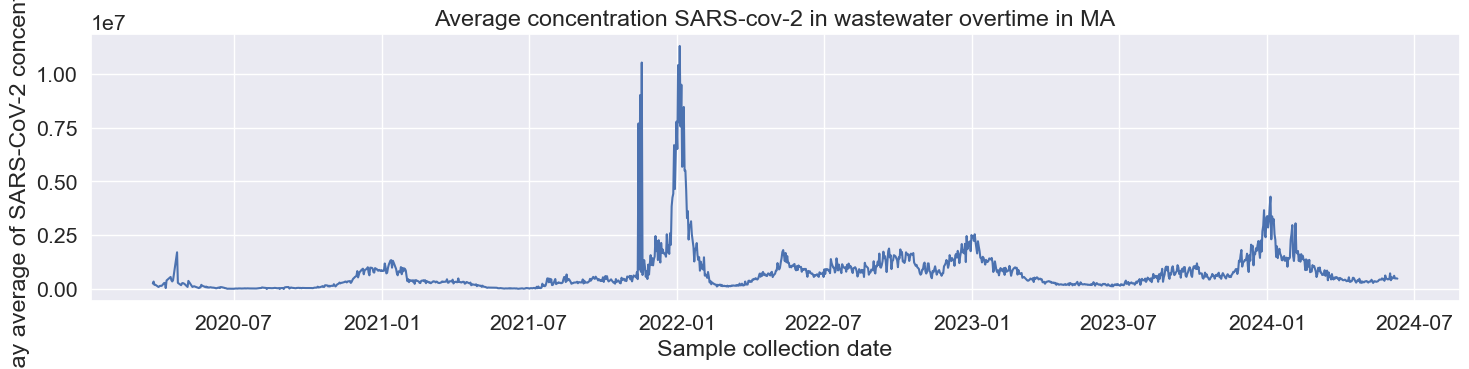

In [510]:
plt.figure(figsize=(15,4))
sns.lineplot(wastewater_samples_data, x='Sample collection date', y='7 day average of SARS-CoV-2 concentration').set(title='Average concentration SARS-cov-2 in wastewater overtime in MA');


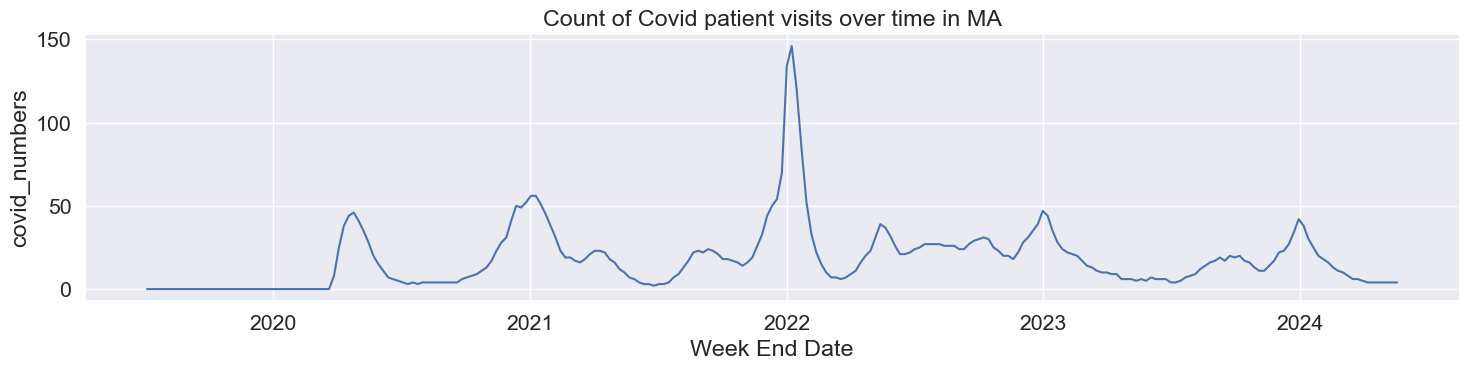

In [511]:
# Comparison overtime with clinical data
Clinical_count=pd.DataFrame(Covid_series.groupby('Week End Date').sum('covid_numbers')['covid_numbers']).reset_index()
plt.figure(figsize=(15,4))
sns.lineplot(Clinical_count, x='Week End Date', y='covid_numbers').set(title='Count of Covid patient visits over time in MA');

# Time series analysis

In [512]:
# Importing last preprocssed data
Covid_series=pd.read_csv('Covid_series.csv', index_col=0)

In [513]:
Covid_series.head()

Season Visit type Week Start Date Week End Date  Total visits  \
0  2023-2024  ED visits      2023-07-02    2023-07-08         65444   
1  2023-2024  ED visits      2024-02-04    2024-02-10         64281   
2  2023-2024  ED visits      2023-08-20    2023-08-26         64582   
3  2023-2024  ED visits      2023-12-10    2023-12-16         67477   
4  2023-2024  ED visits      2023-12-17    2023-12-23         66234   

   Percent of visits for acute respiratory diseases  \
0                                             0.082   
1                                             0.164   
2                                             0.094   
3                                             0.187   
4                                             0.205   

   Percent of all visits for COVID-19  Percent of all visits for influenza  \
0                               0.005                                0.001   
1                               0.019                                0.030   
2                               0.018                                0.001   
3                               0.030                                0.021   
4                               0.037                                0.032   

   Percent of all visits for RSV Last updated  covid_numbers  rsv_numbers  \
0                          0.000   2024-05-23            3.0          0.0   
1                          0.002   2024-05-23           12.0          1.0   
2                          0.000   2024-05-23           12.0          0.0   
3                          0.014   2024-05-23           20.0          9.0   
4                          0.012   2024-05-23           25.0          8.0   

   influenza_numbers  
0                1.0  
1               19.0  
2                1.0  
3               14.0  
4               21.0

* Observations: The seasonality is captured yearly. Every year begining date shifts by a month in dataset.

In [514]:
Covid_series['Week Start Date'].value_counts()

Week Start Date
2023-07-02    2
2021-09-26    2
2022-09-25    2
2021-10-17    2
2023-05-14    2
             ..
2020-08-09    2
2023-04-02    2
2020-06-21    2
2020-04-05    2
2019-12-08    2
Name: count, Length: 255, dtype: int64

In [515]:
Covid_series['Week End Date'].value_counts()

Week End Date
2023-07-08    2
2021-10-02    2
2022-10-01    2
2021-10-23    2
2023-05-20    2
             ..
2020-08-15    2
2023-04-08    2
2020-06-27    2
2020-04-11    2
2019-12-14    2
Name: count, Length: 255, dtype: int64

In [516]:
Covid_series['Visit type'].value_counts()

Visit type
ED visits     255
Admissions    255
Name: count, dtype: int64

In [517]:
# Merging the visit types and summing up the counts for a single date series.
Covid_series_dated=Covid_series[['Season', 'Week Start Date','Week End Date', 'covid_numbers', 'rsv_numbers', 'influenza_numbers']].groupby(['Season','Week Start Date','Week End Date']).sum(['covid_numbers', 'rsv_numbers', 'influenza_numbers']).reset_index()

In [518]:
Covid_series_dated.Season.value_counts()


Season
2020-2021    53
2019-2020    52
2021-2022    52
2022-2023    52
2023-2024    46
Name: count, dtype: int64

### Begin and end weeks for each season

In [519]:
#
print("2020-2021 season")
print(Covid_series_dated[(Covid_series_dated['Season']=='2020-2021')][['Week Start Date', 'Week End Date']].head(1))
print(Covid_series_dated[(Covid_series_dated['Season']=='2020-2021')][['Week Start Date', 'Week End Date']].tail(1))

2020-2021 season
   Week Start Date Week End Date
52      2020-06-28    2020-07-04
    Week Start Date Week End Date
104      2021-06-27    2021-07-03


In [520]:
#
print("2021-2022 season")
print(Covid_series_dated[(Covid_series_dated['Season']=='2021-2022')][['Week Start Date', 'Week End Date']].head(1))
print(Covid_series_dated[(Covid_series_dated['Season']=='2021-2022')][['Week Start Date', 'Week End Date']].tail(1))


2021-2022 season
    Week Start Date Week End Date
105      2021-07-04    2021-07-10
    Week Start Date Week End Date
156      2022-06-26    2022-07-02


In [521]:
#
print("2022-2023 season")
print(Covid_series_dated[(Covid_series_dated['Season']=='2022-2023')][['Week Start Date', 'Week End Date']].head(1))
print(Covid_series_dated[(Covid_series_dated['Season']=='2022-2023')][['Week Start Date', 'Week End Date']].tail(1))


2022-2023 season
    Week Start Date Week End Date
157      2022-07-03    2022-07-09
    Week Start Date Week End Date
208      2023-06-25    2023-07-01


In [522]:
#
print("2023-2024 season")
print(Covid_series_dated[(Covid_series_dated['Season']=='2023-2024')][['Week Start Date', 'Week End Date']].head(1))
print(Covid_series_dated[(Covid_series_dated['Season']=='2023-2024')][['Week Start Date', 'Week End Date']].tail(1))


2023-2024 season
    Week Start Date Week End Date
209      2023-07-02    2023-07-08
    Week Start Date Week End Date
254      2024-05-12    2024-05-18


### The seasonality trend is of 52 records. from month 07 -month 07 of next year. The first record needs to be dropped.

In [523]:
Covid_series_dated.head()

Season Week Start Date Week End Date  covid_numbers  rsv_numbers  \
0  2019-2020      2019-06-30    2019-07-06            0.0          0.0   
1  2019-2020      2019-07-07    2019-07-13            0.0          0.0   
2  2019-2020      2019-07-14    2019-07-20            0.0          0.0   
3  2019-2020      2019-07-21    2019-07-27            0.0          0.0   
4  2019-2020      2019-07-28    2019-08-03            0.0          0.0   

   influenza_numbers  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0

In [524]:
# Dropping the first record of 2019-06-30 to 2019-07-06 and making series with perfect 52 seasons each.
Covid_series_dated=Covid_series_dated.drop(index=[0]).reset_index(drop=True)

In [525]:
Covid_series_dated.to_csv('Covid_series_dated.csv')

In [526]:
Covid_series_dated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Season             254 non-null    object 
 1   Week Start Date    254 non-null    object 
 2   Week End Date      254 non-null    object 
 3   covid_numbers      254 non-null    float64
 4   rsv_numbers        254 non-null    float64
 5   influenza_numbers  254 non-null    float64
dtypes: float64(3), object(3)
memory usage: 12.0+ KB


## Taking season 2023-2-24 as our horizon for prediction
### Naive methods for initial analysis

In [527]:
train=Covid_series_dated[:-47]
test=Covid_series_dated[-47:]

In [528]:
## Spliting data into test and train set
train.shape, test.shape

((207, 6), (47, 6))

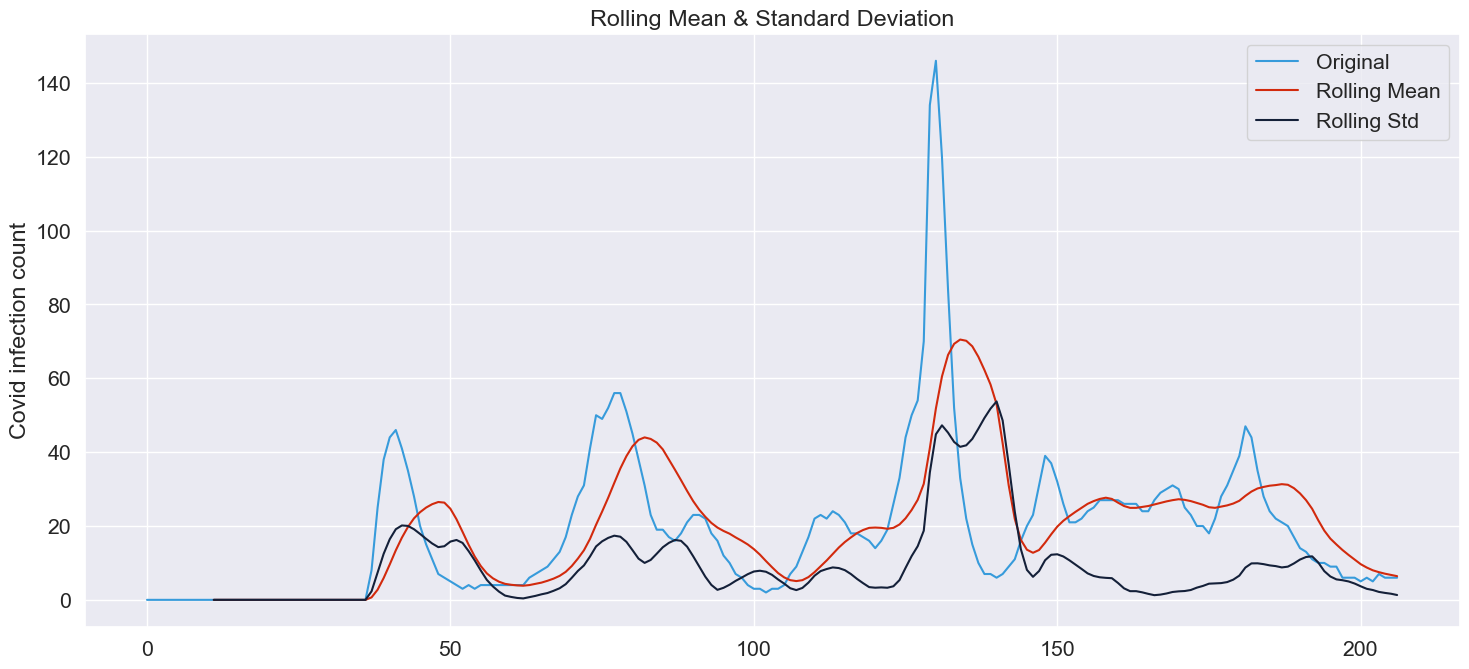

In [529]:
# Determine rolling stats for covid numbers
#Determine rolling statistics
train["rolling_avg"] = train["covid_numbers"].rolling(window=12).mean() #window size 12 denotes 12 weeks, giving rolling mean at weekly level
train["rolling_std"] = train["covid_numbers"].rolling(window=12).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(train["covid_numbers"], color='#379BDB', label='Original')
plt.plot(train["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(train["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.ylabel('Covid infection count')
plt.show(block=False)

### Mean and variance are changing. The data has been collected for a yearly cycle and set comprises of 52 per year.

In [530]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [531]:
# Mean base model using historical data
historical_mean = np.mean(train['covid_numbers'])

# Forecasting this for each instance in horizon
test.loc[:, 'pred_mean_covid_num']=historical_mean

# The performance
mape_hist_mean = mape(test['covid_numbers'], test['pred_mean_covid_num'])



In [532]:
## Forecasting using last years mean
last_year_mean = np.mean(train['covid_numbers'][-52:])


# Forecasting horizon using last year mean
test.loc[:, 'pred__last_yr_mean_covind_num'] = last_year_mean

mape_last_year_mean = mape(test['covid_numbers'], test['pred__last_yr_mean_covind_num'])


In [533]:
## Forecasting using last value
last = train['covid_numbers'].iloc[-1]

# Forecasting horizon using last value
test.loc[:, 'pred_last_val_covid_num'] = last

mape_last = mape(test['covid_numbers'], test['pred_last_val_covid_num'])


In [534]:
## Forecasting with naiive seasonal
test['naive_seasonal'] = train['covid_numbers'].iloc[160:207].values

In [535]:
Covid_series_dated.columns

Index(['Season', 'Week Start Date', 'Week End Date', 'covid_numbers',
       'rsv_numbers', 'influenza_numbers'],
      dtype='object')

### The mean and variance are changing.

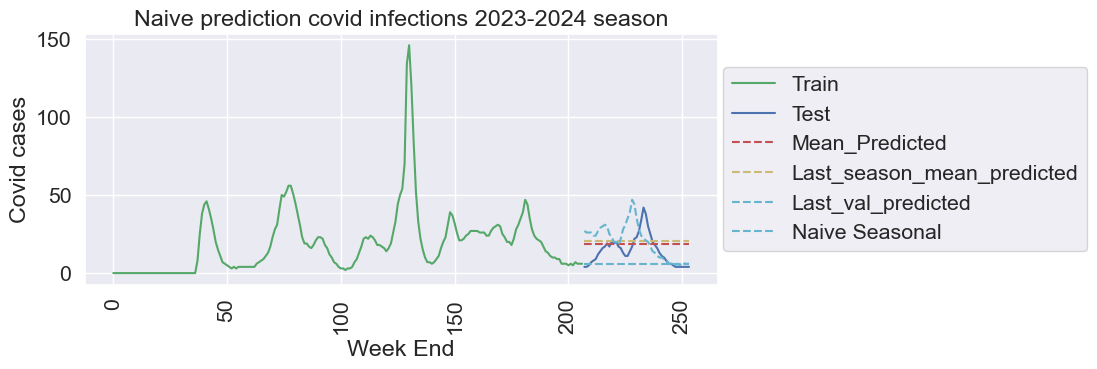

In [536]:
plt.rcParams["figure.figsize"] = [10, 4]
plt.rcParams["figure.autolayout"] = True
Train, = plt.plot( train['covid_numbers'], 'g-', label='Train')
Test,= plt.plot( test['covid_numbers'], 'b-', label='Test')
Mean_predicted, =plt.plot( test['pred_mean_covid_num'], 'r--', label='Mean_Predicted')
Last_season_mean_predicted,= plt.plot(test['pred__last_yr_mean_covind_num'], 'y--', label='Last_season_mean_predicted')
Last_val_predicted=plt.plot( test['pred_last_val_covid_num'], 'c--', label='Last_val_predicted')
Seasonal_last_predicted=plt.plot( test['naive_seasonal'], 'c--', label='Naive Seasonal')
plt.title("Naive prediction covid infections 2023-2024 season")
plt.xlabel('Week End')
plt.xticks(rotation=90)
plt.ylabel('Covid cases')
plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5));


In [537]:
print('The historical mean:', historical_mean, 'Mean Absolute percentage error in prediction:', mape_hist_mean)
print('Last season mean:', last_year_mean, "Mean Absolute percentage error in prediction:", mape_last_year_mean)
print('Last value of covid infections', last, "Mean Absolute percentage error in prediction:", mape_last )

The historical mean: 18.840579710144926 Mean Absolute percentage error in prediction: 123.05289164035571
Last season mean: 20.846153846153847 Mean Absolute percentage error in prediction: 142.27514173746022
Last value of covid infections 6.0 Mean Absolute percentage error in prediction: 53.79763520196068


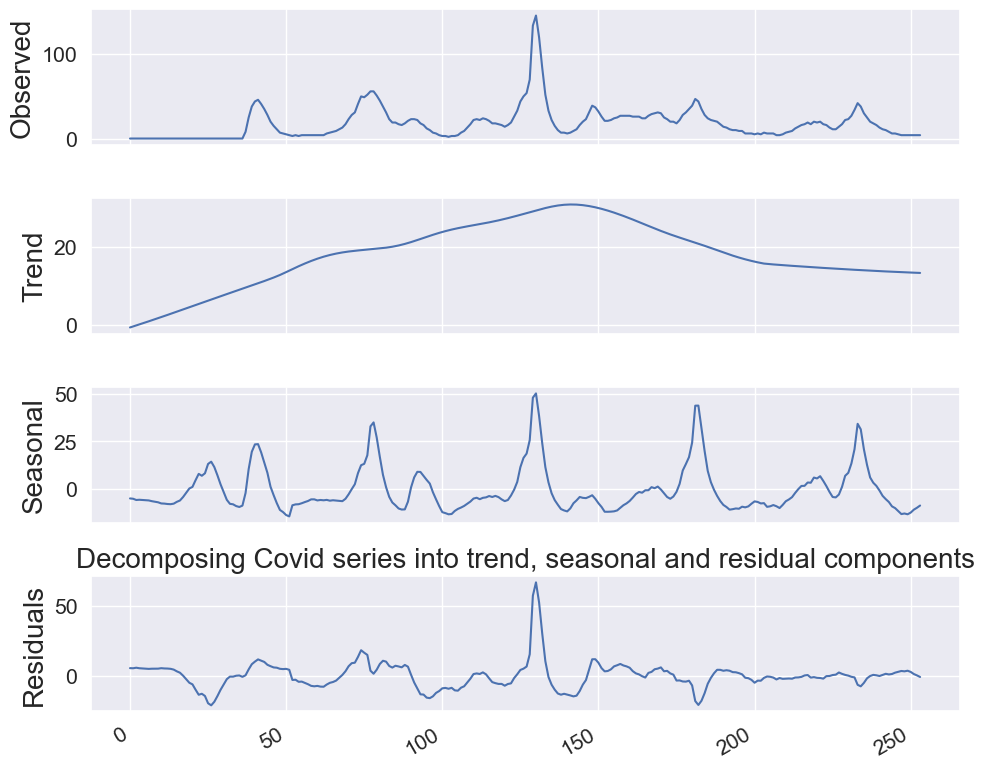

In [538]:
# The decomostion library
from statsmodels.tsa.seasonal import STL

decomposition = STL(Covid_series_dated['covid_numbers'], period=52).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True,
figsize=(10,8))
plt.title("Decomposing Covid series into trend, seasonal and residual components", fontsize=20)

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed', fontsize=20)

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend', fontsize=20)

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal', fontsize=20)

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals', fontsize=20)


fig.autofmt_xdate()
plt.tight_layout()

In [539]:
# Testig the covid series for stationarity


ADF_covid_result = adfuller(train['covid_numbers'])

print(f'ADF Statistic: {ADF_covid_result[0]}')
print(f'p-value: {ADF_covid_result[1]}')


ADF Statistic: -4.181715458735899
p-value: 0.0007074647484000106


* The series is stationary as P value is less than 0.01, the null hypothesis can be rejected, which is the series is not stationary.

* Next we will check if it can be aproximated with MA/AR models

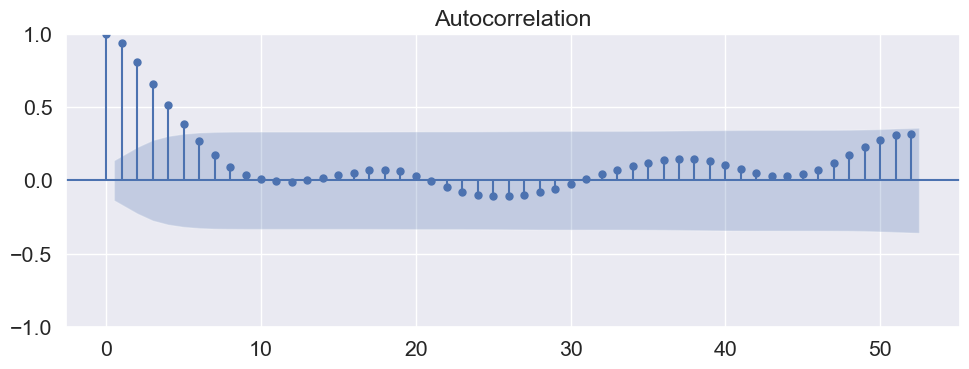

In [540]:
# Autocorrelation of series. Current vs past values relationship, we have taken a lag of full season with 52 samples.
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(train['covid_numbers'], lags=52);

* The auto-corelation shows 4 lags and small sinosoidal coefficients. Next we will plot PACF to verify how well it can be approximated with AR for the sinosoidal component

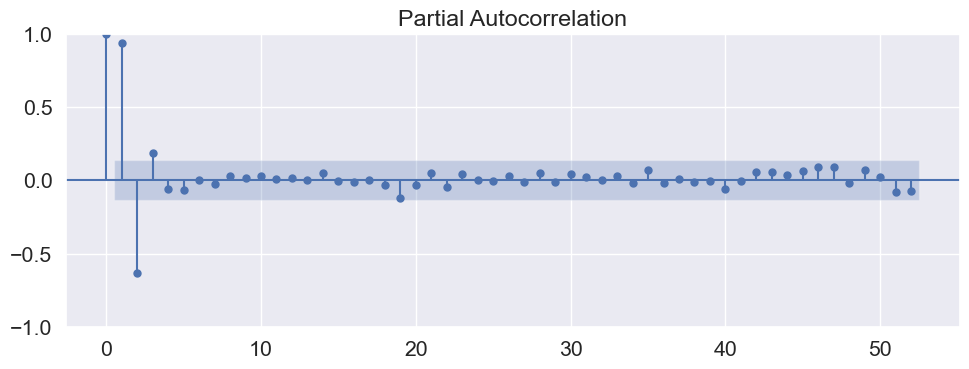

In [541]:
# Partial autocorrelation of series. Current vs past values relationship, we have taken a lag of full season with 52 samples.
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(train['covid_numbers'], lags=52);

plt.tight_layout()

* The lags 1 & 2 show coefficients, rest are very small. The best option would be to use multiple parameters and find out best model parameters.

### Time series analysis

In [542]:
### The function for finding best AIC with different parameters


def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(
                endog,
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        results.append([order, aic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']

    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

## Using auto_arima

In [543]:

#Standard ARIMA Model
ARIMA_model = pm.auto_arima(train['covid_numbers'],
                      start_p=1,
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=52, max_q=52, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

In [544]:
ARIMA_model

ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True)

In [545]:
ARIMA_model.aic()

1278.9615790781752

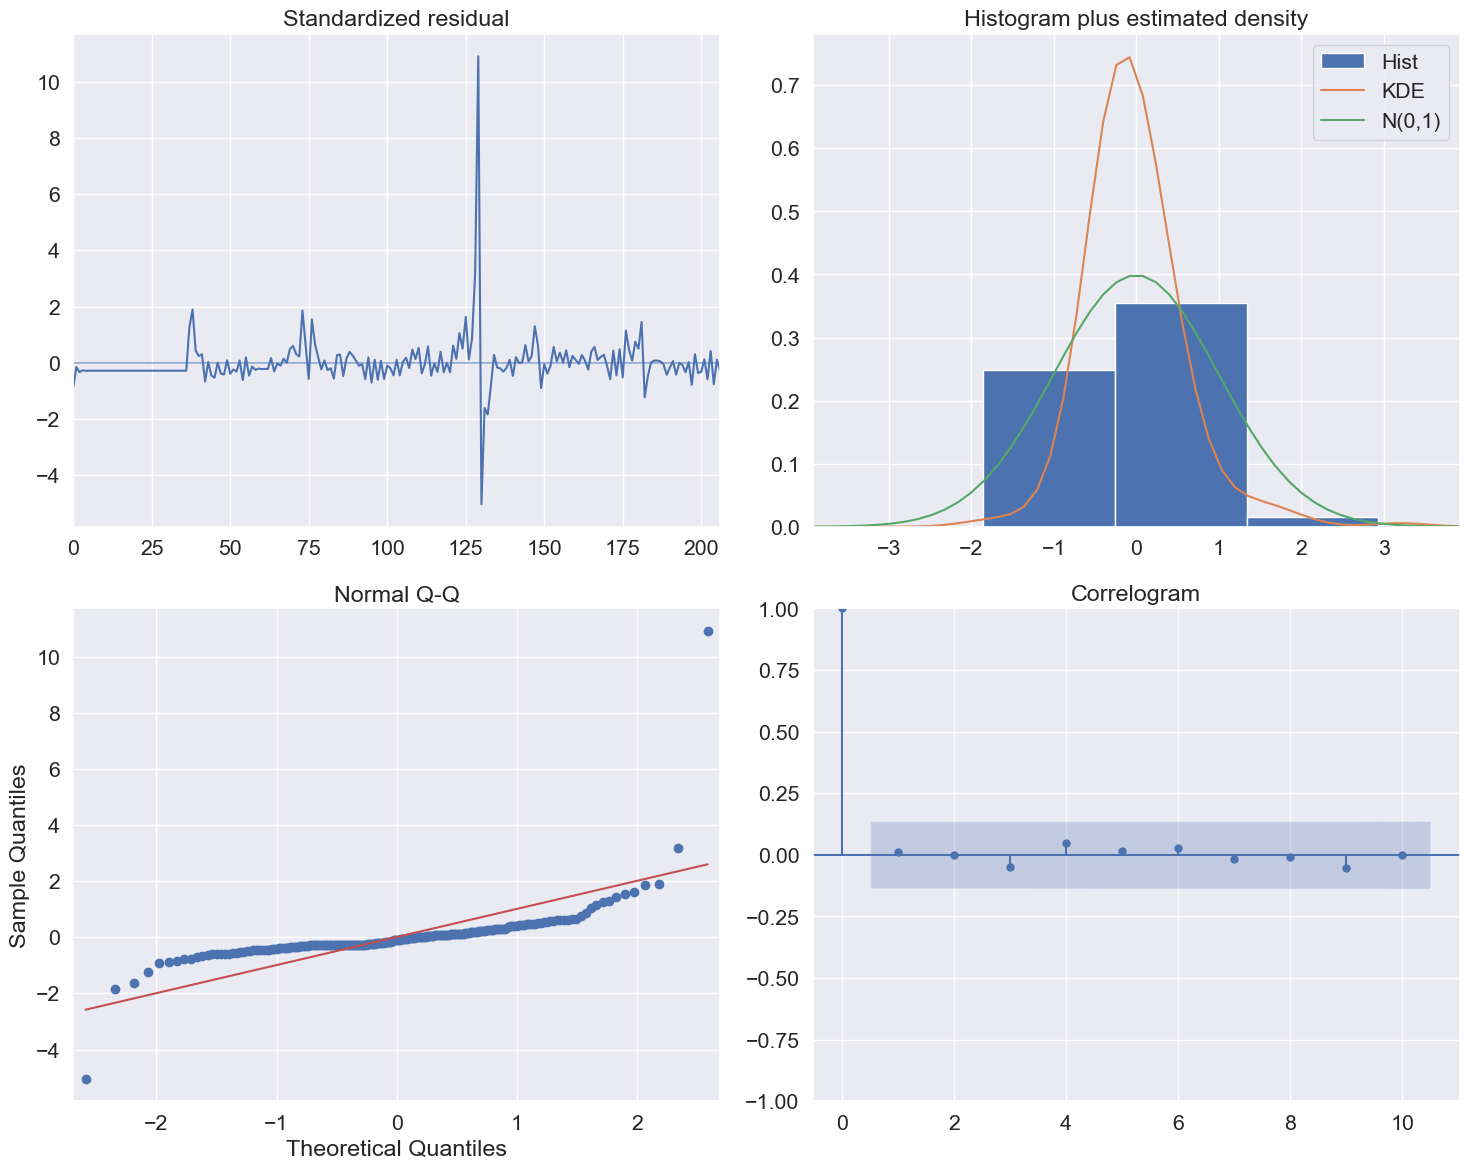

In [546]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [547]:
## Fitting the model with best parameters identified in the above 2 iterations
ARIMA_model = SARIMAX(train['covid_numbers'], order=(2,0,1), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)

In [548]:
# AIC of the model
ARIMA_model_fit.aic

1286.333373504653

In [549]:
# The residual tests

residuals =ARIMA_model_fit.resid
acorr_ljungbox(residuals, np.arange(1, 200, 1))

lb_stat  lb_pvalue
1     0.002239   0.962262
2     0.089624   0.956177
3     2.349389   0.503125
4     2.349411   0.671788
5     2.552150   0.768621
..         ...        ...
195  65.587083   1.000000
196  65.591698   1.000000
197  65.597342   1.000000
198  65.598863   1.000000
199  65.602885   1.000000

[199 rows x 2 columns]

In [550]:
## Rolling forecast for ARIMA model
def rolling_forecast_arima(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon
    end_idx = train_len

    if method == 'last_season':
        pred_last_season = []

        for i in range(train_len, total_len, window):
            last_season = df['covid_numbers'][i-window:i].values
            pred_last_season.extend(last_season)

        return pred_last_season

    elif method == 'ARIMA':
        pred_ARIMA = []

        for i in range(train_len, total_len, window):
            model = SARIMAX(df['covid_numbers'][:i], order=(2,0,1), seasonal_order=(0,0,0,52), simple_differencing=False)
            res = model.fit(disp=False)
            predictions = res.get_prediction(end_idx, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARIMA.extend(oos_pred)

        return pred_ARIMA

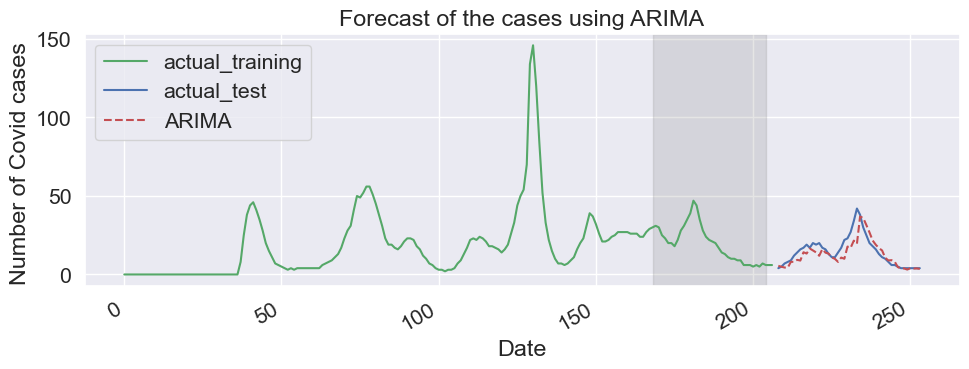

In [551]:
# Defining the parameters for forecasting
train.shape[0],test.shape[0]

pred_df = test[-46:]


pred_df['arima']=rolling_forecast_arima(Covid_series_dated, train.shape[0], 45, 2, 'ARIMA')


# ARIMA plot
fig, ax = plt.subplots()
plt.title("Forecast of the cases using ARIMA")

ax.plot(train['covid_numbers'],'g-', label='actual_training')
ax.plot(pred_df['covid_numbers'], 'b-', label='actual_test')
ax.plot(pred_df.arima, 'r--', label='ARIMA')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Covid cases ')
ax.axvspan(168, 204, color='#808080', alpha=0.2)
ax.legend(loc=2)


fig.autofmt_xdate()
plt.tight_layout()


In [552]:
print('The predicted values arima model:\n', pred_df['arima'])

The predicted values arima model:
 208     5.478379
209     4.913674
210     4.416317
211     4.318044
212     8.070327
213     8.023813
214     9.300482
215     8.849911
216    14.142803
217    13.327015
218    16.536616
219    15.318193
220    14.051567
221    11.923202
222    16.110766
223    13.887825
224    13.279166
225    10.863810
226     9.936930
227     8.004879
228    10.757097
229     9.999069
230    17.772241
231    17.035049
232    21.525314
233    19.595576
234    36.861681
235    35.969554
236    31.455974
237    26.760858
238    21.644651
239    18.910078
240    16.802421
241    15.290416
242    10.596296
243     8.924148
244     9.111784
245     8.186952
246     4.685172
247     3.836406
248     3.846292
249     3.117729
250     3.992101
251     3.752293
252     3.850529
253     3.557765
Name: arima, dtype: float64


## SARIMA model , incorporating seasonality


In [553]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(train['covid_numbers'],
                         start_p=1, start_q=1,
                         test='adf',
                         max_p=52, max_q=52,
                         m=52, # is the frequncy of the cycle
                         start_P=0,
                         seasonal=True, #set to seasonal
                         d=None,
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

In [554]:
# The SARIMA model params.
SARIMA_model

ARIMA(order=(3, 0, 0), scoring_args={}, seasonal_order=(2, 1, 1, 52),
      suppress_warnings=True, with_intercept=False)

In [555]:
### To insert best value here

SARIMA_model = SARIMAX(train['covid_numbers'], order=(3,0,0), seasonal_order=(2,1,1,52), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

In [556]:
SARIMA_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                        covid_numbers   No. Observations:                  207
Model:             SARIMAX(3, 0, 0)x(2, 1, [1], 52)   Log Likelihood                -480.472
Date:                              Fri, 02 May 2025   AIC                            974.944
Time:                                      18:20:52   BIC                            996.248
Sample:                                           0   HQIC                           983.597
                                              - 207                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7593      0.026     66.581      0.000       1.707       1.811
ar.L2         -1.0328      0.068    -15.088      0.000      -1.167      -0.899
ar.L3          0.2304      0.060      3.829      0.000       0.112       0.348
ar.S.L52      -0.7748      0.258     -3.007      0.003      -1.280      -0.270
ar.S.L104     -0.8778      0.101     -8.686      0.000      -1.076      -0.680
ma.S.L52      -0.2349      1.434     -0.164      0.870      -3.046       2.577
sigma2         8.4061      5.039      1.668      0.095      -1.470      18.283
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4547.89
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.95   Skew:                             2.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

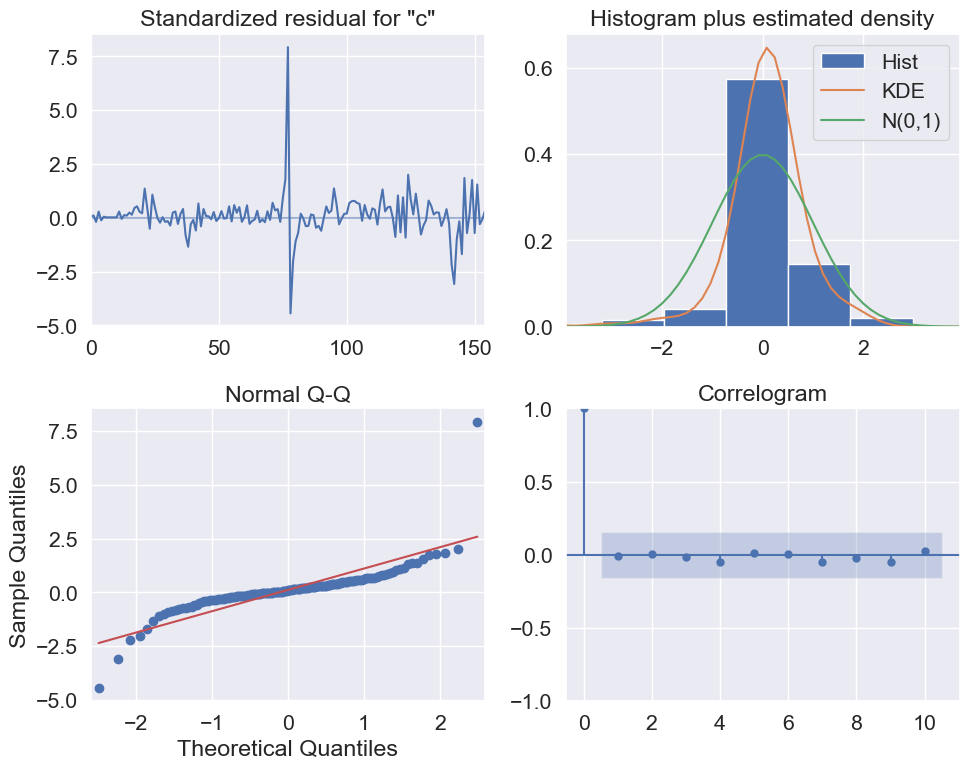

In [557]:
# Residuals
SARIMA_model_fit.plot_diagnostics(figsize=(10,8));

In [558]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = SARIMA_model_fit.resid
acorr_ljungbox(residuals, np.arange(1, 200, 1))

lb_stat     lb_pvalue
1     78.227031  9.185294e-19
2    137.134331  1.665936e-30
3    176.646415  4.673570e-38
4    202.268141  1.222368e-42
5    216.935460  6.735501e-45
..          ...           ...
195  345.308049  1.838066e-10
196  345.330745  2.452169e-10
197  345.348778  3.266769e-10
198  345.354099  4.353420e-10
199  345.366645  5.778014e-10

[199 rows x 2 columns]

In [559]:
def rolling_forecast_sarima(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:

    total_len = train_len + horizon
    end_idx = train_len

    if method == 'last_season':
        pred_last_season = []

        for i in range(train_len, total_len, window):
            last_season = df['covid_numbers'][i-window:i].values
            pred_last_season.extend(last_season)

        return pred_last_season

    elif method == 'SARIMA':
        pred_SARIMA = []

        for i in range(train_len, total_len, window):
            model = SARIMAX(df['covid_numbers'][:i], order=(3,0,0), seasonal_order=(2,1,1,52), simple_differencing=False)
            res = model.fit(disp=False)
            predictions = res.get_prediction(end_idx, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_SARIMA.extend(oos_pred)

        return pred_SARIMA

# Initializing
sarima_pred=test[-45:]



In [560]:
sarima_pred['sarima']=rolling_forecast_sarima(Covid_series_dated, train.shape[0], 45, 3, 'SARIMA')

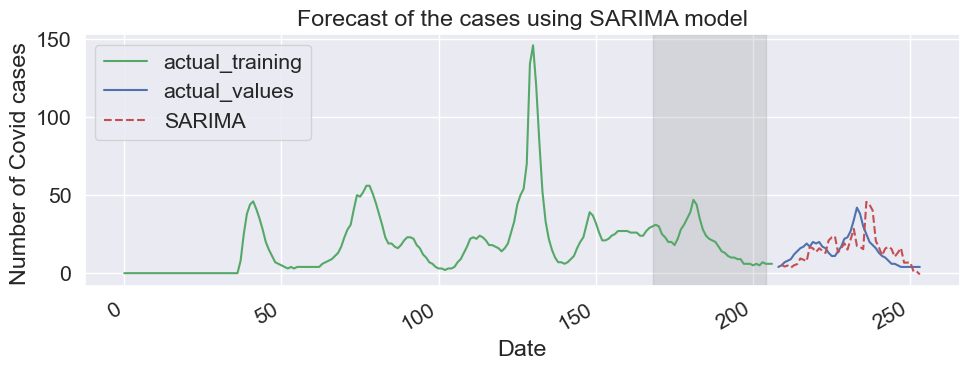

In [561]:
# SARIMA plot
fig, ax = plt.subplots()
plt.title("Forecast of the cases using SARIMA model")
ax.plot(train['covid_numbers'],'g-', label='actual_training')
ax.plot(pred_df['covid_numbers'], 'b-', label='actual_values')
ax.plot(sarima_pred.sarima, 'r--', label='SARIMA')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Covid cases ')
ax.axvspan(168, 204, color='#808080', alpha=0.2)
ax.legend(loc=2)


fig.autofmt_xdate()
plt.tight_layout()

In [562]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Comparing ARIMA, SARIMA, SARIMAX model alongwith naiive projections

In [563]:
## Forecasting with naiive seasonal
test['naive_seasonal'] = train['covid_numbers'].iloc[160:207].values

In [564]:
mape_ARIMA = mape(pred_df['covid_numbers'], pred_df['arima'])
mape_SARIMA = mape(sarima_pred['covid_numbers'], sarima_pred['sarima'])
mape_naive_seasonal=mape(test['covid_numbers'],test['naive_seasonal'])
print(mape_naive_seasonal, mape_SARIMA, mape_ARIMA )

94.80406285680112 61.92347636576238 22.833120039886058


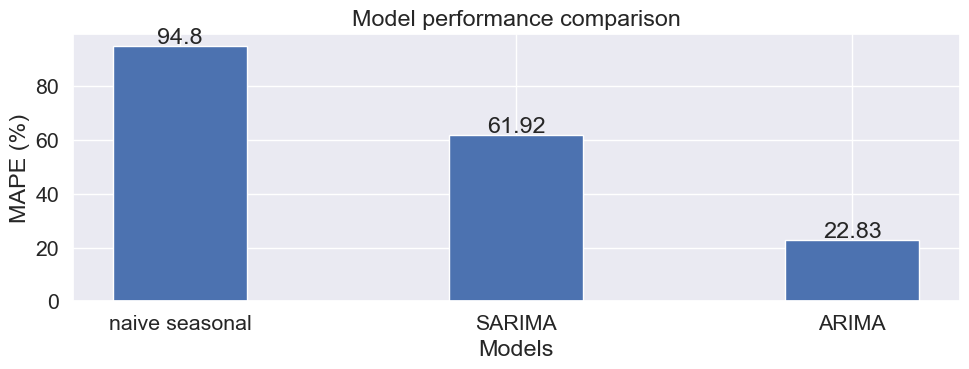

In [565]:
fig, ax = plt.subplots()
plt.title('Model performance comparison')

x = ['naive seasonal', 'SARIMA', 'ARIMA' ]
y = [mape_naive_seasonal, mape_SARIMA, mape_ARIMA ]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()

## Exog model with wastewater

In [566]:
#Covid_series_dated=pd.read_csv('Covid_series_dated.csv')
Covid_series_dated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Season             254 non-null    object 
 1   Week Start Date    254 non-null    object 
 2   Week End Date      254 non-null    object 
 3   covid_numbers      254 non-null    float64
 4   rsv_numbers        254 non-null    float64
 5   influenza_numbers  254 non-null    float64
dtypes: float64(3), object(3)
memory usage: 12.0+ KB


In [567]:
Covid_series_dated['Week Start Date'] = pd.to_datetime(Covid_series_dated['Week Start Date'])
Covid_series_dated['Week End Date'] = pd.to_datetime(Covid_series_dated['Week End Date'])
wastewater_samples_data['Sample collection date'] = pd.to_datetime(wastewater_samples_data['Sample collection date'])

In [568]:
wastewater_samples_data.sort_values(by='Sample collection date')[:2]

Sample collection date  Number of samples in the last 7 days  \
0             2020-03-23                                     2   
1             2020-03-24                                     2   

   7 day average of SARS-CoV-2 concentration  SARS-CoV-2 Detected  
0                               254896.99895                    0  
1                               346593.30850                    0

In [569]:
wastewater_samples_data.sort_values(by='Sample collection date')[-2:]

Sample collection date  Number of samples in the last 7 days  \
1478             2024-06-09                                    31   
1479             2024-06-10                                    35   

      7 day average of SARS-CoV-2 concentration  SARS-CoV-2 Detected  
1478                              494386.239224                    0  
1479                              482139.538986                    0

In [570]:
Covid_series_dated['Week End Date'].sort_values()[:3]

0   2019-07-13
1   2019-07-20
2   2019-07-27
Name: Week End Date, dtype: datetime64[ns]

In [571]:
Covid_series_dated['Week End Date'].sort_values()[-3:]

251   2024-05-04
252   2024-05-11
253   2024-05-18
Name: Week End Date, dtype: datetime64[ns]

In [572]:
# The wastewater samples is till 2024-06-10 and Covid data is till 2024-05-18. Dropping all the values after 2024-05-18

index_drop=wastewater_samples_data[wastewater_samples_data['Sample collection date'] > '2024-05-18'].index

In [573]:
index_drop

Index([1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468,
       1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479],
      dtype='int64')

In [574]:
wastewater_samples_data=wastewater_samples_data.drop(index=index_drop)

In [575]:
wastewater_samples_data=wastewater_samples_data.sort_values(by='Sample collection date').reset_index(drop=True)

In [576]:
Covid_series_dated=Covid_series_dated.sort_values(by='Week End Date').reset_index(drop=True)

In [577]:
# Converting the  sample date to weekend date.
for ind2,row2 in wastewater_samples_data.iterrows():
  for ind1, row in Covid_series_dated.iterrows():
    start_date = row['Week Start Date']
    end_date = row['Week End Date']
    if (row2['Sample collection date'] >= start_date) & (row2['Sample collection date'] <= end_date):
       wastewater_samples_data.loc[ind2,'Sample collection date'] = end_date

#### Comparing end dates

In [578]:
Covid_series_dated['Week End Date'].nunique()

254

In [579]:
wastewater_samples_data['Sample collection date'].nunique()

217

In [580]:
wastewater_samples_data.columns

Index(['Sample collection date', 'Number of samples in the last 7 days',
       '7 day average of SARS-CoV-2 concentration', 'SARS-CoV-2 Detected'],
      dtype='object')

In [581]:
wastewater_samples_grouped = wastewater_samples_data.groupby(['Sample collection date']).agg({
    'Number of samples in the last 7 days': 'sum',
    '7 day average of SARS-CoV-2 concentration': 'mean',
    'SARS-CoV-2 Detected':'sum'

}).reset_index()

In [582]:
wastewater_samples_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Sample collection date                     217 non-null    datetime64[ns]
 1   Number of samples in the last 7 days       217 non-null    int64         
 2   7 day average of SARS-CoV-2 concentration  217 non-null    float64       
 3   SARS-CoV-2 Detected                        217 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 6.9 KB


# Merging the covid and watersamples data

In [583]:
Covid_series_dated.columns

Index(['Season', 'Week Start Date', 'Week End Date', 'covid_numbers',
       'rsv_numbers', 'influenza_numbers'],
      dtype='object')

In [584]:
cov_water=pd.merge(Covid_series_dated,wastewater_samples_grouped, left_on='Week End Date', right_on='Sample collection date' )



In [585]:
cov_water.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Season                                     217 non-null    object        
 1   Week Start Date                            217 non-null    datetime64[ns]
 2   Week End Date                              217 non-null    datetime64[ns]
 3   covid_numbers                              217 non-null    float64       
 4   rsv_numbers                                217 non-null    float64       
 5   influenza_numbers                          217 non-null    float64       
 6   Sample collection date                     217 non-null    datetime64[ns]
 7   Number of samples in the last 7 days       217 non-null    int64         
 8   7 day average of SARS-CoV-2 concentration  217 non-null    float64       
 9   SARS-CoV-2 Detected  

In [586]:
cov_water.to_csv('cov_water.csv')

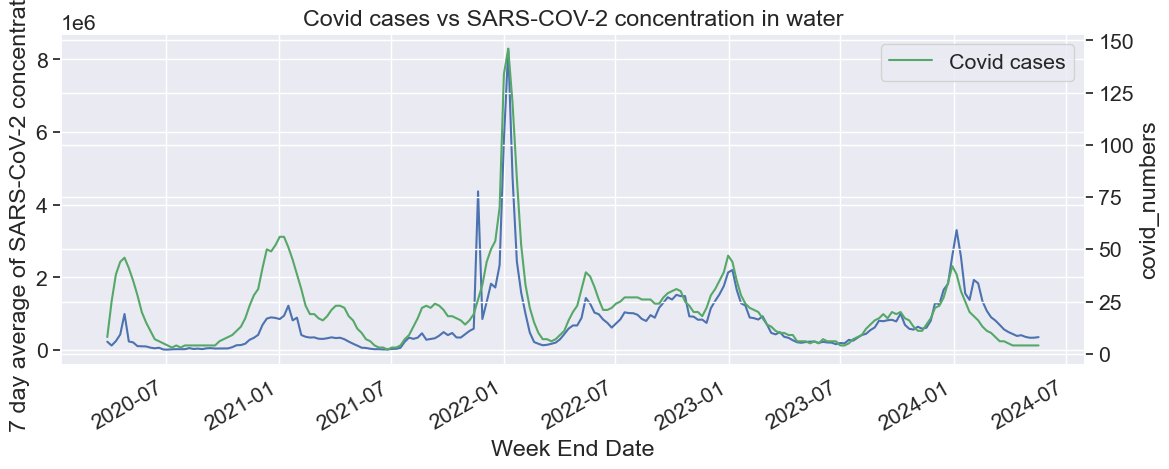

In [587]:
# Covid numbers and wastewater concentration plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.lineplot(cov_water, y='7 day average of SARS-CoV-2 concentration', x='Week End Date', color="b").set(title='Covid cases vs SARS-COV-2 concentration in water')
ax2 = plt.twinx()
sns.lineplot(cov_water, y='covid_numbers', x='Week End Date', color="g", ax=ax2, legend='brief', label='Covid cases')
plt.gcf().autofmt_xdate()
plt.show();

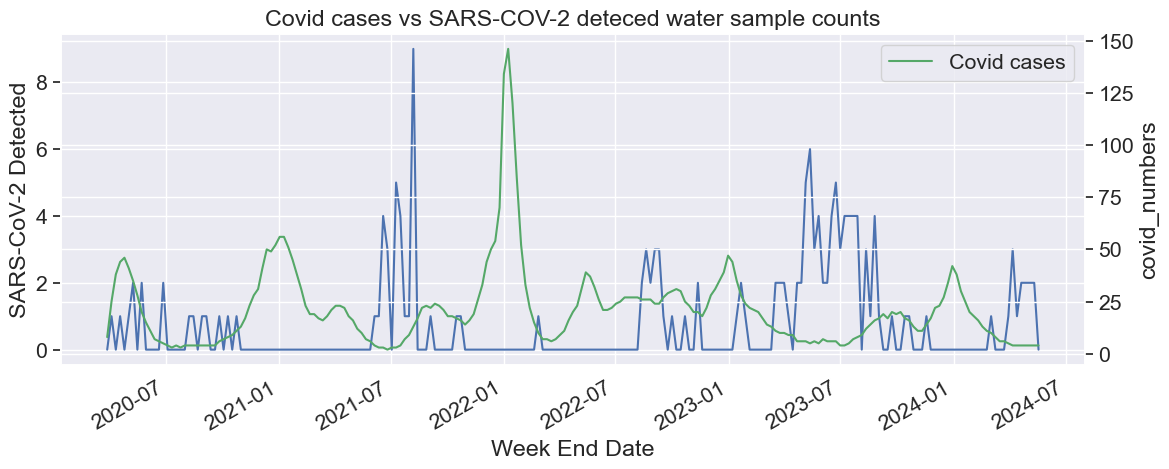

In [588]:
# Covid numbers and wastewater concentration plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.lineplot(cov_water, y='SARS-CoV-2 Detected', x='Week End Date', color="b").set(title='Covid cases vs SARS-COV-2 deteced water sample counts')
ax2 = plt.twinx()
sns.lineplot(cov_water, y='covid_numbers', x='Week End Date', color="g", ax=ax2, legend='brief', label='Covid cases')
plt.gcf().autofmt_xdate()
plt.show();

### SARIMAX model with exog as waste water feature

In [589]:
cov_water=cov_water[cov_water['Week End Date'] >='2022-05-01'].reset_index(drop=True)

In [590]:
cov_water.to_csv('cov_water.csv')

In [591]:
cov_water.columns

Index(['Season', 'Week Start Date', 'Week End Date', 'covid_numbers',
       'rsv_numbers', 'influenza_numbers', 'Sample collection date',
       'Number of samples in the last 7 days',
       '7 day average of SARS-CoV-2 concentration', 'SARS-CoV-2 Detected'],
      dtype='object')

In [592]:
cov_water.Season.unique()

array(['2021-2022', '2022-2023', '2023-2024'], dtype=object)

In [593]:
cov_water.Season.value_counts()

Season
2022-2023    52
2023-2024    46
2021-2022     9
Name: count, dtype: int64

In [594]:
# Creating test and train sets, choosing searson 2023-2034 as horizon to forecast.
cov_water_train=cov_water[:61]
cov_water_test=cov_water[61:]

In [595]:
cov_water_test.head()

Season Week Start Date Week End Date  covid_numbers  rsv_numbers  \
61  2023-2024      2023-07-02    2023-07-08            4.0          0.0   
62  2023-2024      2023-07-09    2023-07-15            5.0          0.0   
63  2023-2024      2023-07-16    2023-07-22            7.0          0.0   
64  2023-2024      2023-07-23    2023-07-29            8.0          0.0   
65  2023-2024      2023-07-30    2023-08-05            9.0          0.0   

    influenza_numbers Sample collection date  \
61                1.0             2023-07-08   
62                0.0             2023-07-15   
63                0.0             2023-07-22   
64                0.0             2023-07-29   
65                1.0             2023-08-05   

    Number of samples in the last 7 days  \
61                                   231   
62                                   323   
63                                   318   
64                                   294   
65                                   281   

    7 day average of SARS-CoV-2 concentration  SARS-CoV-2 Detected  
61                              187691.193921                    4  
62                              285192.988076                    4  
63                              261600.771124                    4  
64                              341710.054520                    4  
65                              416658.985370                    0

In [596]:
# Verification for stationarity

ad_fuller_result = adfuller(cov_water_train['covid_numbers'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.2828644313080964
p-value: 0.1775541028141368


In [597]:
ad_fuller_result = adfuller(cov_water_train['7 day average of SARS-CoV-2 concentration'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -0.8918661807719681
p-value: 0.7906391982055894


### Both series have stationarity

In [598]:
#adding exogenous variable - option 1 with differencing on season
# SARIMAX Model
SARIMAX_model = pm.auto_arima(cov_water_train[['covid_numbers']], exogenous=cov_water_train[['7 day average of SARS-CoV-2 concentration']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=30, max_q=30, m=1,
                           start_P=0, seasonal=False,
                           d=None, D=0,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

In [599]:
SARIMAX_model

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [600]:
### To insert best value here

SARIMAX_model = SARIMAX(cov_water_train[['covid_numbers']],cov_water_train[['7 day average of SARS-CoV-2 concentration']], order=(2,1,1), seasonal_order=(0,0,0,0), simple_differencing=False)
SARIMAX_model_fit = SARIMAX_model.fit(disp=False)

In [601]:
# Checking model summary
SARIMAX_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          covid_numbers   No. Observations:                   61
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -130.863
Date:                Fri, 02 May 2025   AIC                            271.727
Time:                        18:32:06   BIC                            282.199
Sample:                             0   HQIC                           275.823
                                 - 61                                         
Covariance Type:                  opg                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
7 day average of SARS-CoV-2 concentration  1.221e-05   1.39e-06      8.772      0.000    9.48e-06    1.49e-05
ar.L1                                             -0      0.059         -0      1.000      -0.115       0.115
ar.L2                                              0      0.132          0      1.000      -0.259       0.259
ma.L1                                              0      0.059          0      1.000      -0.115       0.115
sigma2                                        3.8372      0.596      6.442      0.000       2.670       5.005
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.56   Prob(JB):                         0.87
Heteroskedasticity (H):               0.64   Skew:                            -0.07
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.96e+18. Standard errors may be unstable.
"""

In [602]:
SARIMAX_model_fit.aic

271.72698130148115

In [603]:
SARIMAX_model_fit.params

7 day average of SARS-CoV-2 concentration    0.000012
ar.L1                                       -0.000000
ar.L2                                        0.000000
ma.L1                                        0.000000
sigma2                                       3.837209
dtype: float64

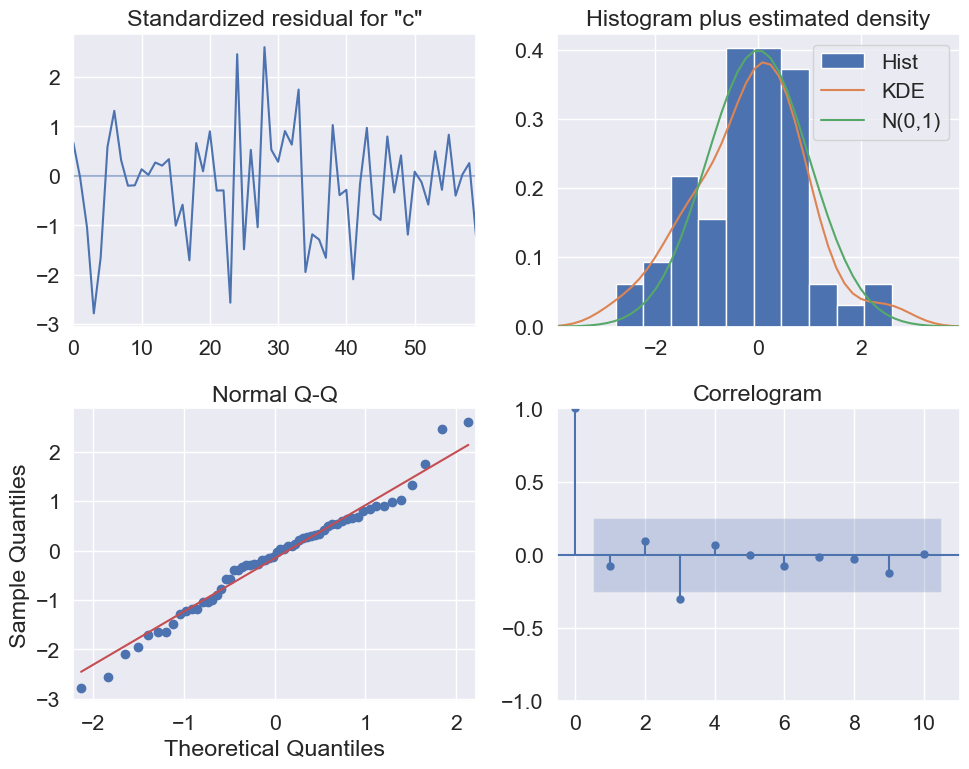

In [604]:
# Verifying residuals for normal distrobution
SARIMAX_model_fit.plot_diagnostics(figsize=(10,8));

In [605]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = SARIMAX_model_fit.resid
acorr_ljungbox(residuals, np.arange(1, 53, 1))

lb_stat  lb_pvalue
1    0.023756   0.877508
2    0.153967   0.925905
3    2.079963   0.555977
4    3.196214   0.525543
5    3.766563   0.583490
6    3.772622   0.707415
7    4.205060   0.755879
8    4.219547   0.836792
9    4.427048   0.881129
10   4.427240   0.926022
11   4.531152   0.951735
12   4.596621   0.970115
13   4.600157   0.982974
14   5.145185   0.983688
15   5.262032   0.989666
16   6.870226   0.975682
17   7.583771   0.974656
18   7.708120   0.982672
19   8.522831   0.980593
20   8.760405   0.985520
21   8.804533   0.990670
22   9.169381   0.992402
23   9.295663   0.994858
24  10.541073   0.991927
25  11.899207   0.987361
26  12.827772   0.985456
27  12.949810   0.989563
28  14.075818   0.986642
29  15.730477   0.978441
30  15.744633   0.984802
31  15.805797   0.989162
32  17.115732   0.985363
33  18.248880   0.982343
34  20.608561   0.965733
35  23.867141   0.922695
36  24.466247   0.927661
37  24.759276   0.938164
38  25.581778   0.938138
39  26.054680   0.944217
40  26.235216   0.954049
41  26.256081   0.964251
42  28.336645   0.947103
43  28.370773   0.958101
44  29.018506   0.960153
45  29.521492   0.963738
46  29.924049   0.968022
47  30.619059   0.969114
48  30.646507   0.975859
49  30.892944   0.979851
50  32.608024   0.972973
51  32.608734   0.979007
52  32.745888   0.983074

## The residuals are not correlated as per ljungbox test and correlogram. Hence we can consider the wastewater as exog.

In [606]:
def rolling_forecast_exog(endog: Union[pd.Series, list], exog: Union[pd.Series, list], train_len: int, horizon: int, window: int, method: str) -> list:

    total_len = train_len + horizon

    if method == 'last':
        pred_last_value = []

        for i in range(train_len, total_len, window):
            last_value = endog[:i].iloc[-1]
            pred_last_value.extend(last_value for _ in range(window))

        return pred_last_value

    elif method == 'SARIMAX':
        pred_SARIMAX = []

        for i in range(train_len, total_len, window):
            model = SARIMAX(endog[:i], exog[:i], order=(2,1,1), seasonal_order=(0,0,0,0), simple_differencing=False)
            res = model.fit(disp=False)
            predictions = res.get_prediction(exog=exog)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_SARIMAX.extend(oos_pred)

        return pred_SARIMAX

In [607]:
pred_df_wastewater=cov_water_test

In [608]:
pred_last_value = rolling_forecast_exog(cov_water[['covid_numbers']], cov_water[['7 day average of SARS-CoV-2 concentration']],  61, 46, 2, 'last')
pred_SARIMAX = rolling_forecast_exog(cov_water[['covid_numbers']], cov_water[['7 day average of SARS-CoV-2 concentration']],  61, 46, 2, 'SARIMAX')

pred_df_wastewater['pred_last_value'] = pred_last_value
pred_df_wastewater['pred_SARIMAX'] = pred_SARIMAX


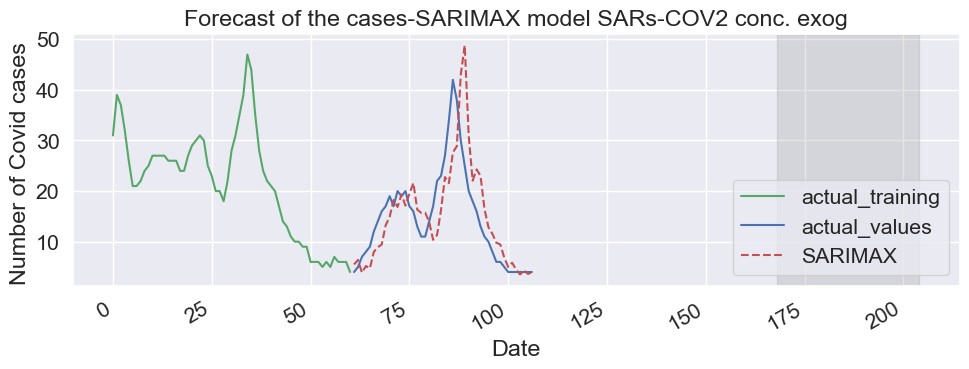

In [609]:
# SARIMA plot
fig, ax = plt.subplots()
plt.title("Forecast of the cases-SARIMAX model SARs-COV2 conc. exog")
ax.plot(cov_water_train['covid_numbers'],'g-', label='actual_training')
ax.plot(pred_df_wastewater['covid_numbers'], 'b-', label='actual_values')
ax.plot(pred_df_wastewater['pred_SARIMAX'], 'r--', label='SARIMAX')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Covid cases ')
ax.axvspan(168, 204, color='#808080', alpha=0.2)
ax.legend(loc=4)


fig.autofmt_xdate()
plt.tight_layout()

## Model with 2 exogs

In [610]:
# Taking SARs count of positive samples as exog

In [611]:
ad_fuller_result = adfuller(cov_water['SARS-CoV-2 Detected'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.2384961851264267
p-value: 0.017861742935051404


# SARS-CoV-2 Detected series also has stationarity.

In [612]:
#adding exogenous variable - option 1 with differencing on season
# SARIMAX Model
SARIMAX_model_2 = pm.auto_arima(cov_water_train[['covid_numbers']], exogenous=cov_water_train[['7 day average of SARS-CoV-2 concentration', 'SARS-CoV-2 Detected']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=30, max_q=30, m=1,
                           start_P=0, seasonal=False,
                           d=None, D=0,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

In [613]:
# Best parmeters
SARIMAX_model_2

ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [614]:
### To insert best value here

SARIMAX_model_2 = SARIMAX(cov_water_train[['covid_numbers']],cov_water_train[['7 day average of SARS-CoV-2 concentration', 'SARS-CoV-2 Detected']], order=(2,1,1), seasonal_order=(0,0,0,0), simple_differencing=False)
SARIMAX_model_2_fit = SARIMAX_model_2.fit(disp=False)

# Checking model summary
SARIMAX_model_2_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          covid_numbers   No. Observations:                   61
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -130.523
Date:                Fri, 02 May 2025   AIC                            273.045
Time:                        18:32:10   BIC                            285.611
Sample:                             0   HQIC                           277.961
                                 - 61                                         
Covariance Type:                  opg                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
7 day average of SARS-CoV-2 concentration  1.205e-05   1.37e-06      8.780      0.000    9.36e-06    1.47e-05
SARS-CoV-2 Detected                          -0.2356      0.286     -0.825      0.410      -0.795       0.324
ar.L1                                             -0      0.058         -0      1.000      -0.113       0.113
ar.L2                                              0      0.130          0      1.000      -0.256       0.256
ma.L1                                              0      0.058          0      1.000      -0.113       0.113
sigma2                                        3.7222      0.590      6.305      0.000       2.565       4.879
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.56   Prob(JB):                         0.88
Heteroskedasticity (H):               0.59   Skew:                            -0.12
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.84e+17. Standard errors may be unstable.
"""

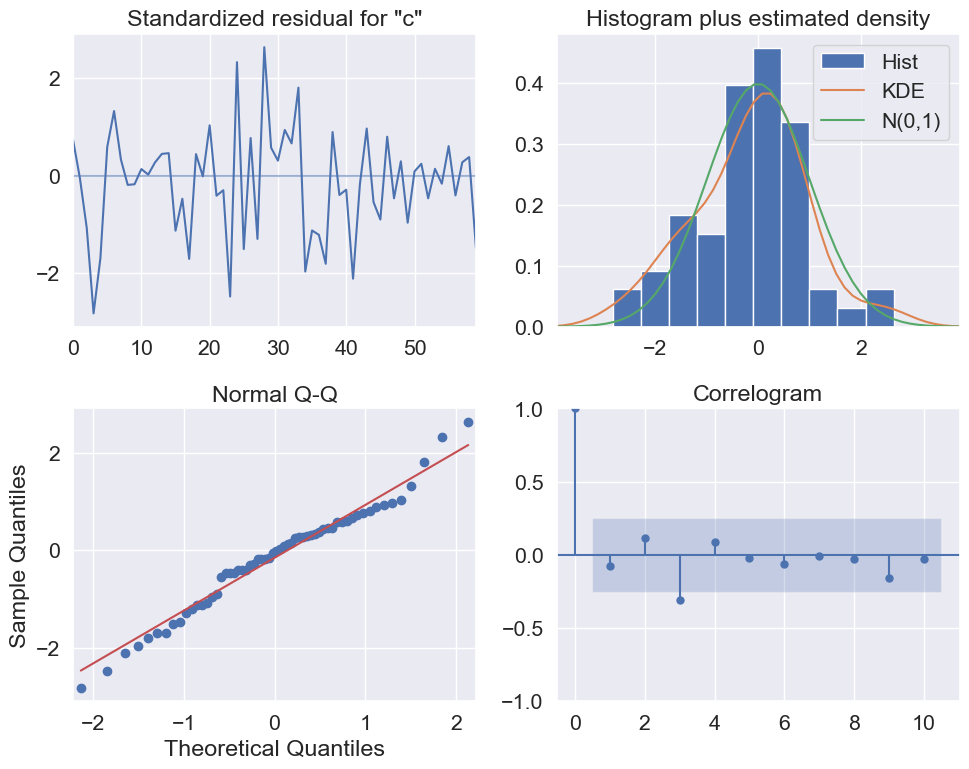

In [615]:
# Verifying residuals for normal distrobution
SARIMAX_model_2_fit.plot_diagnostics(figsize=(10,8));


In [616]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = SARIMAX_model_2_fit.resid
acorr_ljungbox(residuals)


lb_stat  lb_pvalue
1   0.031234   0.859720
2   0.198876   0.905346
3   2.194824   0.532969
4   3.219422   0.521800
5   3.914252   0.561827
6   3.928708   0.686324
7   4.373827   0.735853
8   4.387100   0.820619
9   4.712445   0.858620
10  4.730507   0.908438

## The residuals are not correlated as per ljungbox test and correlogram. Hence we can consider just the wastewater SAR-cov2 conentration and  count of samples detected positive for covid as  exog.

In [617]:
pred_last_value = rolling_forecast_exog(cov_water[['covid_numbers']], cov_water[['7 day average of SARS-CoV-2 concentration', 'SARS-CoV-2 Detected']],  61, 46, 2, 'last')
pred_SARIMAX = rolling_forecast_exog(cov_water[['covid_numbers']], cov_water[['7 day average of SARS-CoV-2 concentration','SARS-CoV-2 Detected']],  61, 46, 2, 'SARIMAX')

pred_df_wastewater['pred_SARIMAX_2'] = pred_SARIMAX

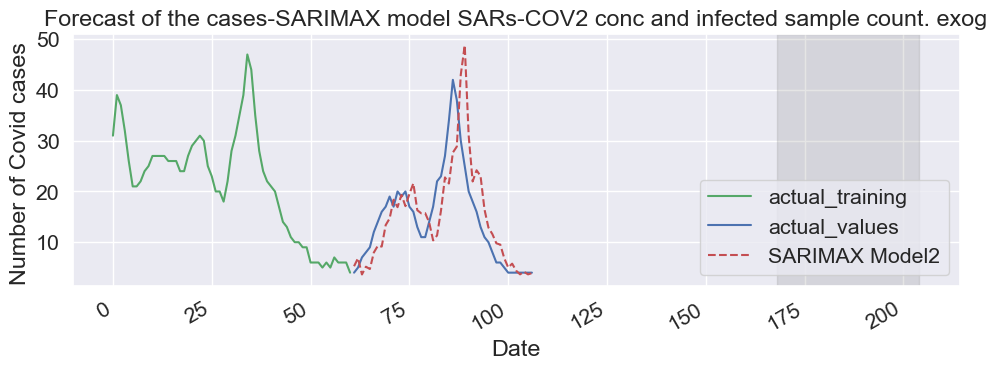

In [618]:
# SARIMA plot
fig, ax = plt.subplots()
plt.title("Forecast of the cases-SARIMAX model SARs-COV2 conc and infected sample count. exog")
ax.plot(cov_water_train['covid_numbers'],'g-', label='actual_training')
ax.plot(pred_df_wastewater['covid_numbers'], 'b-', label='actual_values')
ax.plot(pred_df_wastewater['pred_SARIMAX_2'], 'r--', label='SARIMAX Model2')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Covid cases ')
ax.axvspan(168, 204, color='#808080', alpha=0.2)
ax.legend(loc=4)


fig.autofmt_xdate()
plt.tight_layout()

## Exog model comparisons

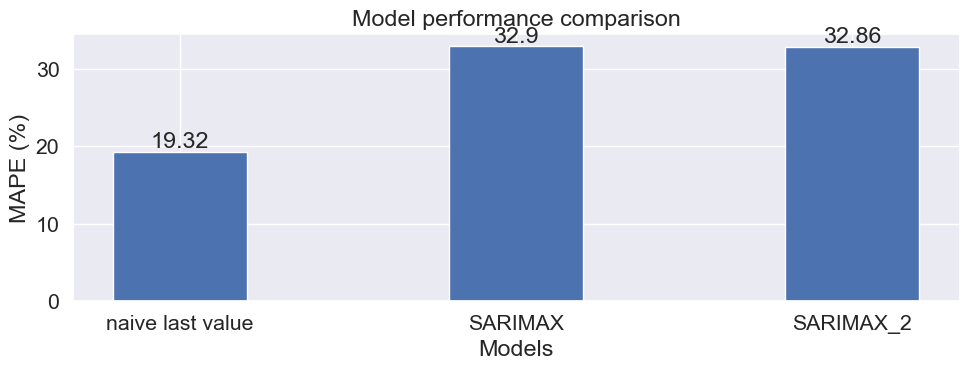

In [619]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_last = mape(pred_df_wastewater['covid_numbers'], pred_df_wastewater['pred_last_value'])
mape_SARIMAX = mape(pred_df_wastewater['covid_numbers'], pred_df_wastewater['pred_SARIMAX'])
mape_SARIMAX_2 = mape(pred_df_wastewater['covid_numbers'], pred_df_wastewater['pred_SARIMAX_2'])

fig, ax = plt.subplots()
plt.title('Model performance comparison')

x = ['naive last value', 'SARIMAX', 'SARIMAX_2']
y = [mape_last, mape_SARIMAX, mape_SARIMAX_2]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.5, s=str(round(value,2)), ha='center')

plt.tight_layout()

## VAR model using wastewater analysis data

In [620]:
ad_fuller_result_1 = adfuller(cov_water['covid_numbers'])
print('realdpi')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(cov_water['7 day average of SARS-CoV-2 concentration'])

print('realcons')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

realdpi
ADF Statistic: -3.324600971705239
p-value: 0.013813990318679763

---------------------

realcons
ADF Statistic: -3.0195300861823036
p-value: 0.03311035246297326


In [621]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.varmax import VARMAX

def optimize_VAR(endog: Union[pd.Series, list]) -> pd.DataFrame:

    results = []
    for i in tqdm_notebook(range(52)):
      try:
        model = VARMAX(endog, order=(i, 0)).fit(dips=False)
      except:
          continue
      aic = model.aic
      results.append([i, aic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['p', 'AIC']
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df

In [622]:
result_df = optimize_VAR(cov_water_train[['covid_numbers', '7 day average of SARS-CoV-2 concentration']])
result_df

  0%|          | 0/52 [00:00<?, ?it/s]

p            AIC
0    3    1908.445950
1    4    1908.520355
2    6    1909.305266
3    5    1911.475823
4    7    1911.489123
5    8    1915.232268
6    1    1928.695018
7   11    1940.840896
8   12    1946.104529
9   17    2110.185479
10  14    2148.002916
11  18    2157.763741
12  19    2308.629163
13   2  794706.651737

In [623]:
# Import Granger causality test utility
from statsmodels.tsa.stattools import grangercausalitytests

In [624]:
# Best p value is 11

print('SARs-Cov2 conc causes Granger-causes Covid?\n')
print('------------------')
granger_1 = grangercausalitytests(cov_water_train[['covid_numbers', '7 day average of SARS-CoV-2 concentration']].diff()[11:], [3])

print('\nCovid numbers Granger-causes SARS-Cov2-conc?\n')
print('------------------')
granger_2 = grangercausalitytests(cov_water_train[['7 day average of SARS-CoV-2 concentration', 'covid_numbers']].diff()[11:], [3])

SARs-Cov2 conc causes Granger-causes Covid?

------------------

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6905  , p=0.5632  , df_denom=40, df_num=3
ssr based chi2 test:   chi2=2.4339  , p=0.4874  , df=3
likelihood ratio test: chi2=2.3729  , p=0.4987  , df=3
parameter F test:         F=0.6905  , p=0.5632  , df_denom=40, df_num=3

Covid numbers Granger-causes SARS-Cov2-conc?

------------------

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=12.0963 , p=0.0000  , df_denom=40, df_num=3
ssr based chi2 test:   chi2=42.6393 , p=0.0000  , df=3
likelihood ratio test: chi2=30.3454 , p=0.0000  , df=3
parameter F test:         F=12.0963 , p=0.0000  , df_denom=40, df_num=3


## Observation: Since Granger causality does not show covid numbers dependent on SAR-Cov2 concentration, we need to use SARIMAX model.
## Both the series should have causality shown by Grangercausality utility.